In [2]:
import pandas as pd

import obspy
from obspy import read, read_inventory
from obspy.signal import PPSD
import numpy as np
import statistics
from obspy.imaging.cm import viridis_white
from obspy import UTCDateTime
import matplotlib.pyplot as plt

In [87]:
from __future__ import print_function
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

plt.style.use('seaborn-whitegrid')
plt.rcParams['figure.figsize'] = 24, 19
plt.rc('xtick', labelsize=16)
plt.rc('font', size=15, weight='normal')
plt.rc('ytick', labelsize=16)
plt.rcParams["axes.labelsize"] = 20
plt.rcParams["axes.labelweight"] = 'normal'
plt.rcParams["lines.markersize"] = 15

plt.rc('xtick.major',size=6,width=1.2)
plt.rc('ytick.major',size=6,width=1.2)
plt.rc('xtick.minor',visible=True,size=4,width=1.2)
plt.rc('ytick.minor',visible=True,size=4,width=1.2)



plt.rcParams['savefig.dpi'] =200

In [4]:
file = r"Wind Speed/WindSpeedHourly29January_30March_2014.csv"
    
df=pd.read_csv(file, parse_dates=True, index_col=0) 

In [5]:
file = r"Wind Speed/Temperature29January_30March_2014.csv"
    
df2=pd.read_csv(file, parse_dates=True, index_col=0) 

In [6]:
pd.options.display.max_rows = 9999
pd.options.display.max_columns = 9999

In [7]:
ELIS = pd.read_csv('CSV/NoiseAndWindSpeed/ELIS_HHZ_29Jan_30Mar2014_psd_values_05.03.2020.csv')
ELIS = ELIS.drop(columns='Unnamed: 0')
ELIS = ELIS.interpolate(axis=1, limit=1)

ANT1 = pd.read_csv('CSV/NoiseAndWindSpeed/ANT1_HHZ_29Jan_30Mar2014_psd_values_05.03.2020.csv')
ANT1 = ANT1.drop(columns='Unnamed: 0')
ANT1 = ANT1.interpolate(axis=1, limit=1)

ANT3 = pd.read_csv('CSV/NoiseAndWindSpeed/ANT3_HHZ_29Jan_30Mar2014_psd_values_05.03.2020.csv')
ANT3 = ANT3.drop(columns='Unnamed: 0')
ANT3 = ANT3.interpolate(axis=1, limit=1)

ANT4 = pd.read_csv('CSV/NoiseAndWindSpeed/ANT4_HHZ_29Jan_30Mar2014_psd_values_05.03.2020.csv')
ANT4 = ANT4.drop(columns='Unnamed: 0')
ANT4 = ANT4.interpolate(axis=1, limit=1)

ANT5 = pd.read_csv('CSV/NoiseAndWindSpeed/ANT5_HHZ_29Jan_30Mar2014_psd_values_05.03.2020.csv')
ANT5 = ANT5.drop(columns='Unnamed: 0')
ANT5 = ANT5.interpolate(axis=1, limit=1)

ANT6 = pd.read_csv('CSV/NoiseAndWindSpeed/ANT6_HHZ_29Jan_30Mar2014_psd_values_05.03.2020.csv')
ANT6 = ANT6.drop(columns='Unnamed: 0')
ANT6 = ANT6.interpolate(axis=1, limit=1)

In [8]:
ELIS_index = []
for i in range(len(ELIS.T.index)):
    x = UTCDateTime(ELIS.T.index[i])
    ELIS_index.append(x)
    
ANT1_index = []
for i in range(len(ANT1.T.index)):
    x = UTCDateTime(ANT1.T.index[i])
    ANT1_index.append(x)

    
ANT3_index = []
for i in range(len(ANT3.T.index)):
    x = UTCDateTime(ANT3.T.index[i])
    ANT3_index.append(x)

    
ANT4_index = []
for i in range(len(ANT4.T.index)):
    x = UTCDateTime(ANT4.T.index[i])
    ANT4_index.append(x)

ANT5_index = []
for i in range(len(ANT5.T.index)):
    x = UTCDateTime(ANT5.T.index[i])
    ANT5_index.append(x)

    
ANT6_index = []
for i in range(len(ANT6.T.index)):
    x = UTCDateTime(ANT6.T.index[i])
    ANT6_index.append(x)

In [9]:
import pandas as pd

import obspy
from obspy import read, read_inventory
from obspy.signal import PPSD
import numpy as np
import statistics
from obspy.imaging.cm import viridis_white
from obspy import UTCDateTime
import matplotlib.pyplot as plt

In [11]:
ppsd = PPSD.load_npz("NPZ/ELIS/ELIS.HHZ.29_89.smoothed.npz", allow_pickle=True)

In [12]:
ELIS_HHZ = PPSD.load_npz("NPZ/ELIS/ELIS.HHZ.29_89.smoothed.npz", allow_pickle=True)
ANT1_HHZ = PPSD.load_npz("NPZ/ANT1/ANT1.HHZ.29_89.smoothed.npz", allow_pickle=True)
ANT3_HHZ = PPSD.load_npz("NPZ/ANT3/ANT3.HHZ.29_89.smoothed.npz", allow_pickle=True)
ANT4_HHZ = PPSD.load_npz("NPZ/ANT4/ANT4.HHZ.29_89.smoothed.npz", allow_pickle=True)
ANT5_HHZ = PPSD.load_npz("NPZ/ANT5/ANT5.HHZ.29_89.smoothed.npz", allow_pickle=True)
ANT6_HHZ = PPSD.load_npz("NPZ/ANT6/ANT6.HHZ.29_89.smoothed.npz", allow_pickle=True)

In [13]:
def rms(s, f):
    return np.sqrt(np.trapz(s, f))

freqs = [(1.0,50.0)]#,(0.1,1.0),(1.0,4.0),(1.0,20.0),(4.0,14.0),(4.0,20.0),(20.,40.)]

per = ELIS_HHZ.period_bin_centers

velocity_spectrum = []
for psd in ELIS_HHZ.psd_values:
    RMS = {}
    for fmin, fmax in freqs:
        ix = np.where((per>=1.0/fmax) & (per<=1.0/fmin))

        spec = psd.copy()[ix][::-1]
        f = 1.0/per.copy()[ix][::-1]

        # remove NaNs from the list
        valid = np.where(np.isfinite(spec))[0]
        spec = spec[valid]
        f = f[valid]

        w2f = (2.0 * np.pi * f)

        amp = 10.0**(spec/10.) / w2f**2

        RMS["%.1f-%.1f"%(fmin, fmax)] = rms(amp, f)

    velocity_spectrum.append(RMS)

index = pd.DatetimeIndex([d.datetime for d in ELIS_HHZ.times_processed])
velocity_spectrum = pd.DataFrame(velocity_spectrum, index=index)

In [14]:
velocity_spectrum

1.0-50.0
2014-01-29 00:00:00  2.239190e-09
2014-01-29 01:00:00  1.779367e-09
2014-01-29 02:00:00  1.761696e-09
2014-01-29 03:00:00  1.837178e-09
2014-01-29 04:00:00  1.910868e-09
2014-01-29 05:00:00  2.093817e-09
2014-01-29 06:00:00  2.149551e-09
2014-01-29 07:00:00  2.363186e-09
2014-01-29 08:00:00  1.469478e-08
2014-01-29 09:00:00  2.414871e-08
2014-01-29 10:00:00  3.215459e-09
2014-01-29 11:00:00  9.824128e-09
2014-01-29 12:00:00  5.302000e-09
2014-01-29 13:00:00  3.781244e-09
2014-01-29 14:00:00  2.277967e-09
2014-01-29 15:00:00  4.358169e-09
2014-01-29 16:00:00  4.939943e-09
2014-01-29 17:00:00  4.135977e-09
2014-01-29 18:00:00  6.309870e-09
2014-01-29 19:00:00  8.881696e-09
2014-01-29 20:00:00  1.782051e-09
2014-01-29 21:00:00  1.977621e-09
2014-01-29 22:00:00  2.182076e-09
2014-01-29 23:00:00  2.680644e-09
2014-01-30 00:00:00  3.346429e-09
2014-01-30 01:00:00  3.495759e-09
2014-01-30 02:00:00  3.985033e-09
2014-01-30 03:00:00  3.047375e-09
2014-01-30 04:00:00  2.525504e-09
2014-01-30 05:00:00  2.288285e-09
2014-01-30 06:00:00  1.760271e-09
2014-01-30 07:00:00  1.970945e-09
2014-01-30 08:00:00  1.259909e-08
2014-01-30 09:00:00  1.238919e-08
2014-01-30 10:00:00  3.658023e-09
2014-01-30 11:00:00  1.337403e-08
2014-01-30 12:00:00  4.920184e-09
2014-01-30 13:00:00  2.979244e-09
2014-01-30 14:00:00  1.377942e-08
2014-01-30 15:00:00  3.050346e-08
2014-01-30 16:00:00  1.608700e-08
2014-01-30 17:00:00  8.445903e-09
2014-01-30 18:00:00  9.014225e-09
2014-01-30 19:00:00  2.981575e-08
2014-01-30 20:00:00  1.801551e-09
2014-01-30 21:00:00  1.853386e-09
2014-01-30 22:00:00  3.677519e-09
2014-01-30 23:00:00  4.034951e-09
2014-01-31 00:00:00  6.058733e-09
2014-01-31 01:00:00  6.662914e-09
2014-01-31 02:00:00  5.875221e-09
2014-01-31 03:00:00  4.658016e-09
2014-01-31 04:00:00  2.798741e-09
2014-01-31 05:00:00  3.699834e-09
2014-01-31 06:00:00  2.949839e-09
2014-01-31 07:00:00  1.856028e-09
2014-01-31 08:00:00  1.643345e-08
2014-01-31 09:00:00  1.806601e-08
2014-01-31 10:00:00  8.406008e-09
2014-01-31 11:00:00  1.777623e-08
2014-01-31 12:00:00  1.565326e-08
2014-01-31 13:00:00  1.576622e-09
2014-01-31 14:00:00  6.715844e-08
2014-01-31 15:00:00  3.878681e-09
2014-01-31 16:00:00  1.568721e-08
2014-01-31 17:00:00  8.495718e-09
2014-01-31 18:00:00  1.626556e-08
2014-01-31 19:00:00  1.343517e-08
2014-01-31 20:00:00  1.930102e-09
2014-01-31 21:00:00  8.696088e-09
2014-01-31 22:00:00  4.931526e-09
2014-01-31 23:00:00  2.384295e-09
2014-02-01 00:00:00  2.654507e-09
2014-02-01 01:00:00  2.918815e-09
2014-02-01 02:00:00  2.729688e-09
2014-02-01 03:00:00  2.720276e-09
2014-02-01 04:00:00  6.856986e-08
2014-02-01 05:00:00  3.452976e-09
2014-02-01 06:00:00  2.161539e-09
2014-02-01 07:00:00  3.633888e-09
2014-02-01 08:00:00  1.455294e-08
2014-02-01 09:00:00  7.351614e-09
2014-02-01 10:00:00  3.760991e-09
2014-02-01 11:00:00  1.400991e-08
2014-02-01 12:00:00  3.848348e-09
2014-02-01 13:00:00  2.345205e-09
2014-02-01 14:00:00  4.638361e-09
2014-02-01 15:00:00  8.901820e-09
2014-02-01 16:00:00  1.733263e-08
2014-02-01 17:00:00  7.207541e-09
2014-02-01 18:00:00  1.118794e-08
2014-02-01 19:00:00  1.849272e-08
2014-02-01 20:00:00  2.598797e-09
2014-02-01 21:00:00  2.171479e-09
2014-02-01 22:00:00  2.352544e-09
2014-02-01 23:00:00  2.277773e-09
2014-02-02 00:00:00  2.413242e-09
2014-02-02 01:00:00  3.396069e-09
2014-02-02 02:00:00  2.534530e-09
2014-02-02 03:00:00  2.842504e-09
2014-02-02 04:00:00  2.595383e-09
2014-02-02 05:00:00  3.531196e-09
2014-02-02 06:00:00  2.144362e-09
2014-02-02 07:00:00  2.278181e-09
2014-02-02 08:00:00  2.415833e-09
2014-02-02 09:00:00  2.331607e-08
2014-02-02 10:00:00  2.683259e-09
2014-02-02 11:00:00  2.330282e-09
2014-02-02 12:00:00  2.347045e-09
2014-02-02 13:00:00  2.560573e-09
2014-02-02 14:00:00  2.518775e-09
2014-02-02 15:00:00  2.440357e-09
2014-02-02 16:00:00  2.546514e-09
2014-02-02 17:00:00  2.681509e-09
2014-02-02 18:00:00  3.506990e-09
2014-02-02 19:00:00  2.681806e-09
2014-02-02 20:00:00  2.861702e-09
2014-02-02 21

In [15]:
velocity_spectrum_ELIS = []
velocity_spectrum_ANT1 = []
velocity_spectrum_ANT3 = []
velocity_spectrum_ANT4 = []
velocity_spectrum_ANT5 = []
velocity_spectrum_ANT6 = []

In [19]:
import bisect
import glob
import math
import os
import warnings

import numpy as np
from matplotlib import mlab
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.ticker import FormatStrFormatter

from obspy import Stream, Trace, UTCDateTime, __version__
from obspy.core import Stats
from obspy.imaging.scripts.scan import compress_start_end
from obspy.core.inventory import Inventory
from obspy.core.util import AttribDict, NUMPY_VERSION
from obspy.core.util.base import MATPLOTLIB_VERSION
from obspy.core.util.obspy_types import ObsPyException
from obspy.imaging.cm import obspy_sequential
from obspy.imaging.util import _set_xaxis_obspy_dates
from obspy.io.xseed import Parser
from obspy.signal.invsim import cosine_taper
from obspy.signal.util import prev_pow_2
from obspy.signal.invsim import paz_to_freq_resp, evalresp

In [ ]:
velocity_spectrum_ELIS = []
velocity_spectrum_ANT1 = []
velocity_spectrum_ANT3 = []
velocity_spectrum_ANT4 = []
velocity_spectrum_ANT5 = []
velocity_spectrum_ANT6 = []

In [16]:
import matplotlib.ticker as mticker

class MathTextSciFormatter(mticker.Formatter):
    def __init__(self, fmt="%1.2e"):
        self.fmt = fmt
    def __call__(self, x, pos=None):
        s = self.fmt % x
        decimal_point = '.'
        positive_sign = '+'
        tup = s.split('e')
        significand = tup[0].rstrip(decimal_point)
        sign = tup[1][0].replace(positive_sign, '')
        exponent = tup[1][1:].lstrip('0')
        if exponent:
            exponent = '10^{%s%s}' % (sign, exponent)
        if significand and exponent:
            s =  r'%s{\times}%s' % (significand, exponent)
        else:
            s =  r'%s%s' % (significand, exponent)
        return "${}$".format(s)

In [17]:
import matplotlib.ticker as mtick
from matplotlib import gridspec

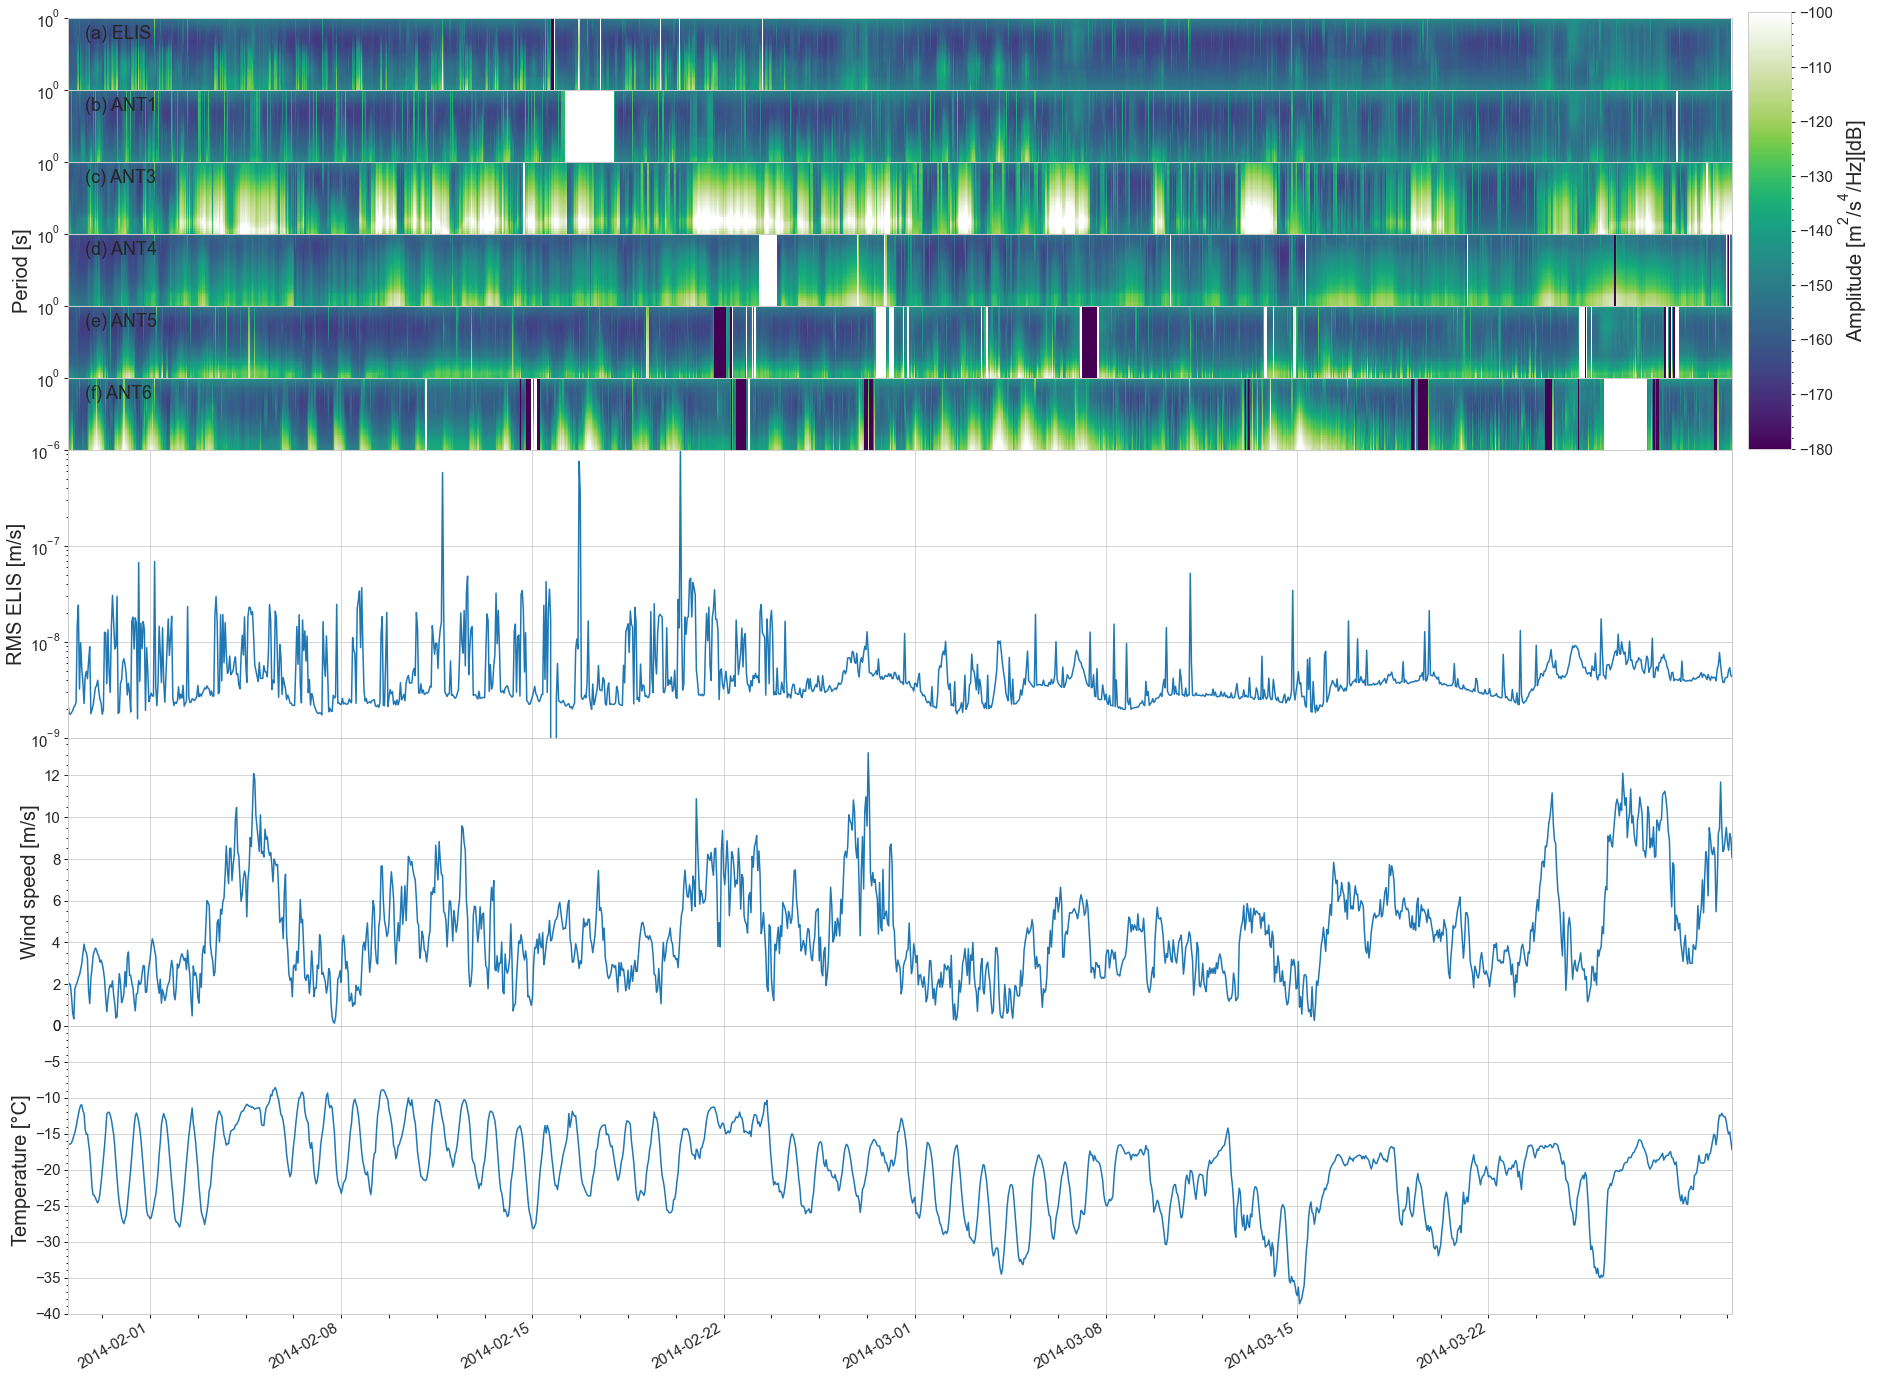

In [45]:
#fig = plt.figure(figsize=(16,12))

fig, axes = plt.subplots(9, 1, sharey=False, sharex=True, squeeze=True)

gs = gridspec.GridSpec(9, 1, height_ratios=[1, 1, 1, 1, 1, 1, 4, 4, 4]) 



velocity_spectrum_ELIS = []
velocity_spectrum_ANT1 = []
velocity_spectrum_ANT3 = []
velocity_spectrum_ANT4 = []
velocity_spectrum_ANT5 = []
velocity_spectrum_ANT6 = []

noise = [ELIS, ANT1, ANT3,ANT4, ANT5, ANT6]

images = [ELIS_HHZ, ANT1_HHZ, ANT3_HHZ,ANT4_HHZ, ANT5_HHZ, ANT6_HHZ]

data_index = [ELIS_index, ANT1_index, ANT3_index, ANT4_index, ANT5_index, ANT6_index]

vel_list = [velocity_spectrum_ELIS,velocity_spectrum_ANT1,velocity_spectrum_ANT3,velocity_spectrum_ANT4,velocity_spectrum_ANT5,velocity_spectrum_ANT6]

first_titles = ['(a)','(b)','(c)','(d)','(e)','(f)','(g)']

second_titles = ['ELIS HHZ', 'ANT1 HHZ', 'ANT3 HHZ','ANT4 HHZ', 'ANT5 HHZ', 'ANT6 HHZ', 'RMS']

third_titles = ['ELIS', 'ANT1', 'ANT3','ANT4', 'ANT5', 'ANT6']

axes[0] = plt.subplot(gs[0])

axes[1] = plt.subplot(gs[1])

axes[2] = plt.subplot(gs[2])

axes[3] = plt.subplot(gs[3])

axes[4] = plt.subplot(gs[4])

axes[5] = plt.subplot(gs[5])

axes[6] = plt.subplot(gs[6])

axes[7] = plt.subplot(gs[7])

axes[8] = plt.subplot(gs[8])


ncol = 1

nrow = 6


for i in range(nrow):

    computed_data = noise[i]

    ppsd = images[i]

    clim = [-190, -90]

    cmap = viridis_white

    grid = None

    filename= None#'PNG/29January_30March2014/ANT6_HHZ_spec_22.01.2020.png'

    show=True

    letter = first_titles[i]

    title = second_titles[i]

    title_bis = third_titles[i]
    
    velocity_list = vel_list[i]
    
    d_index = data_index[i]

    if letter == '(a)':

        dates_difference = computed_data

        yedges = ppsd.period_xedges

        times = []
        for g in range(len(dates_difference.T.index)):
            time = UTCDateTime(dates_difference.T.index[g])
            times.append(time)
        xedges = [t.matplotlib_date for t in times] + \
            [(times[-1] + ppsd.step).matplotlib_date]
        meshgrid_x, meshgrid_y = np.meshgrid(xedges, yedges)

        pc = axes[i].pcolormesh(meshgrid_x,meshgrid_y,dates_difference.values.astype('float'),  cmap=viridis_white,vmin=-180,vmax=-100)
        #fig.colorbar(pc, label='Amplitude [$\mathdefault{m^2/s^4/Hz}$][dB]')

        fig.autofmt_xdate()
        _set_xaxis_obspy_dates(axes[i])

        axes[i].set_yscale("log")
        axes[i].set_xlim(ppsd.times_processed[0].matplotlib_date,
                    (ppsd.times_processed[-1] + ppsd.step).matplotlib_date)

        #ax.set_xlim(0,1462)
        axes[i].set_ylim(0.03,1)

        axes[i].set_yscale('log')

        #ax.set_xlabel('Time')
        
        #axes[i].text(10, 0.9, letter,transform=axes[i].transAxes, ha="left")
        
        #axes[i].text(10, 0.9, title,transform=axes[i].transAxes, ha="center")
        
        axes[i].text(0.01, 0.9, str(letter) + ' ' + str(title_bis),
        horizontalalignment='left',
        verticalalignment='top',
        transform=axes[i].transAxes, fontsize = 18)

        #axes[i].set_title(str(letter) + str(title_bis), fontsize=20, fontweight="normal", loc='left')


        #axes[i].set_title(title, fontsize=20, fontweight="normal", loc='center')


        fig.tight_layout()
        
        def rms(s, f):
            return np.sqrt(np.trapz(s, f))

        freqs = [(1.0,50.0)]

        per = ppsd.period_bin_centers

        velocity_spectrum = []
        for psd in computed_data.T.values:
            RMS = {}
            for fmin, fmax in freqs:
                ix = np.where((per>=1.0/fmax) & (per<=1.0/fmin))

                spec = psd.copy()[ix][::-1]
                f = 1.0/per.copy()[ix][::-1]

                # remove NaNs from the list
                valid = np.where(np.isfinite(spec))[0]
                spec = spec[valid]
                f = f[valid]

                w2f = (2.0 * np.pi * f)

                amp = 10.0**(spec/10.) / w2f**2

                RMS["%.1f-%.1f"%(fmin, fmax)] = rms(amp, f)

            velocity_spectrum.append(RMS)

        index = pd.DatetimeIndex([d.datetime for d in d_index])
        exec(f'cat_{i} = pd.DataFrame(velocity_spectrum, index=index)')

    else:

        import datetime

        dates_difference =  computed_data

        yedges = ppsd.period_xedges

        times = []
        for g in range(len(dates_difference.T.index)):
            time = UTCDateTime(dates_difference.T.index[g])
            times.append(time)
        xedges = [t.matplotlib_date for t in times] + \
            [(times[-1] + ppsd.step).matplotlib_date]
        meshgrid_x, meshgrid_y = np.meshgrid(xedges, yedges)

        pc = axes[i].pcolormesh(meshgrid_x,meshgrid_y,dates_difference.values.astype('float'),  cmap=viridis_white,vmin=-180,vmax=-100)
        #fig.colorbar(pc, label='Amplitude [$\mathdefault{m^2/s^4/Hz}$][dB]')

        fig.autofmt_xdate()
        _set_xaxis_obspy_dates(axes[i])

        axes[i].set_yscale("log")
        axes[i].set_xlim(ppsd.times_processed[0].matplotlib_date,
                    (ppsd.times_processed[-1] + ppsd.step).matplotlib_date)

        #ax.set_xlim(0,1462)
        axes[i].set_ylim(0.03,1)

        axes[i].set_yscale('log')
        
        #locmin = mtick.LogLocator(base=10.0,subs=(0.2,0.4,0.6,0.8),numticks=12)
        #axes[i].yaxis.set_minor_locator(locmin)
        #axes[i].yaxis.set_minor_formatter(mtick.NullFormatter())

        #ax.set_xlabel('Time')
        
        
        axes[i].text(0.01, 0.9, str(letter) + ' ' + str(title_bis),
        horizontalalignment='left',
        verticalalignment='top',
        transform=axes[i].transAxes, fontsize = 18)

        #axes[i].set_title(str(letter) + str(title_bis), fontsize=20, fontweight="normal", loc='left')


        #axes[i].set_title(title, fontsize=20, fontweight="normal", loc='center')
        
        def rms(s, f):
            return np.sqrt(np.trapz(s, f))

        freqs = [(1.0,50.0)]

        per = ppsd.period_bin_centers


        velocity_spectrum = []
        for psd in computed_data.T.values:
            RMS = {}
            for fmin, fmax in freqs:
                ix = np.where((per>=1.0/fmax) & (per<=1.0/fmin))

                spec = psd.copy()[ix][::-1]
                f = 1.0/per.copy()[ix][::-1]

                # remove NaNs from the list
                valid = np.where(np.isfinite(spec))[0]
                spec = spec[valid]
                f = f[valid]

                w2f = (2.0 * np.pi * f)

                amp = 10.0**(spec/10.) / w2f**2

                RMS["%.1f-%.1f"%(fmin, fmax)] = rms(amp, f)

            velocity_spectrum.append(RMS)

        index = pd.DatetimeIndex([d.datetime for d in d_index])
        exec(f'cat_{i} = pd.DataFrame(velocity_spectrum, index=index)')


        fig.tight_layout()
        


t = cat_0['1.0-50.0'] <= 0.0000016
y = cat_0['1.0-50.0'] > 0.0000001

axes[6].plot(cat_0['1.0-50.0'][t], label='ELIS')

#axes[6].yaxis.set_major_formatter(mtick.FormatStrFormatter('%.0e'))





cax = plt.axes([1, 0.666, 0.025, 0.319])
cb = plt.colorbar(pc, cax=cax,aspect=10)
axes[3].set_ylabel('Period [s]', fontsize=20)

axes[7].plot(df.index, df['HWSavg[m/s]'], label='Average Wind Speed')

axes[8].plot(df.index, df2['Temperature'], label='Temperature')

axes[8].set_ylabel('Temperature [°C]', fontsize=20)

axes[7].set_ylabel('Wind speed [m/s]', fontsize=20)


axes[6].set_xlim(df.index[0],df.index[1462])

axes[7].set_xlim(df.index[0],df.index[1462])

axes[8].set_xlim(df.index[0],df.index[1462])



axes[8].set_ylim([-40,0])


#axes[6].set_yscale('log')

axes[7].set_ylim([0,13.8])


import matplotlib.ticker as ticker
scale = 1e6
ticks = ticker.FuncFormatter(lambda x, posd:'{0:g}'.format(x*scale))



axes[6].yaxis.set_major_formatter(ticks)

axes[6].set_yscale( "log")

axes[6].set_ylim([1e-09,1e-06])

axes[6].set_ylabel('RMS ELIS [m/s]', fontsize=20)

#lgd = axes[6].legend(fontsize=18,loc="upper left", ncol=6)


ymin, ymax = axes[6].get_ylim()


#fig.text(0.425, 0.004, 'Datetime', ha='center', va='center',fontsize=25)

cb.ax.set_ylabel('Amplitude [$\mathdefault{m^2/s^4/Hz}$][dB]', fontweight='normal', fontsize=20)

plt.subplots_adjust(hspace=0, wspace=2)


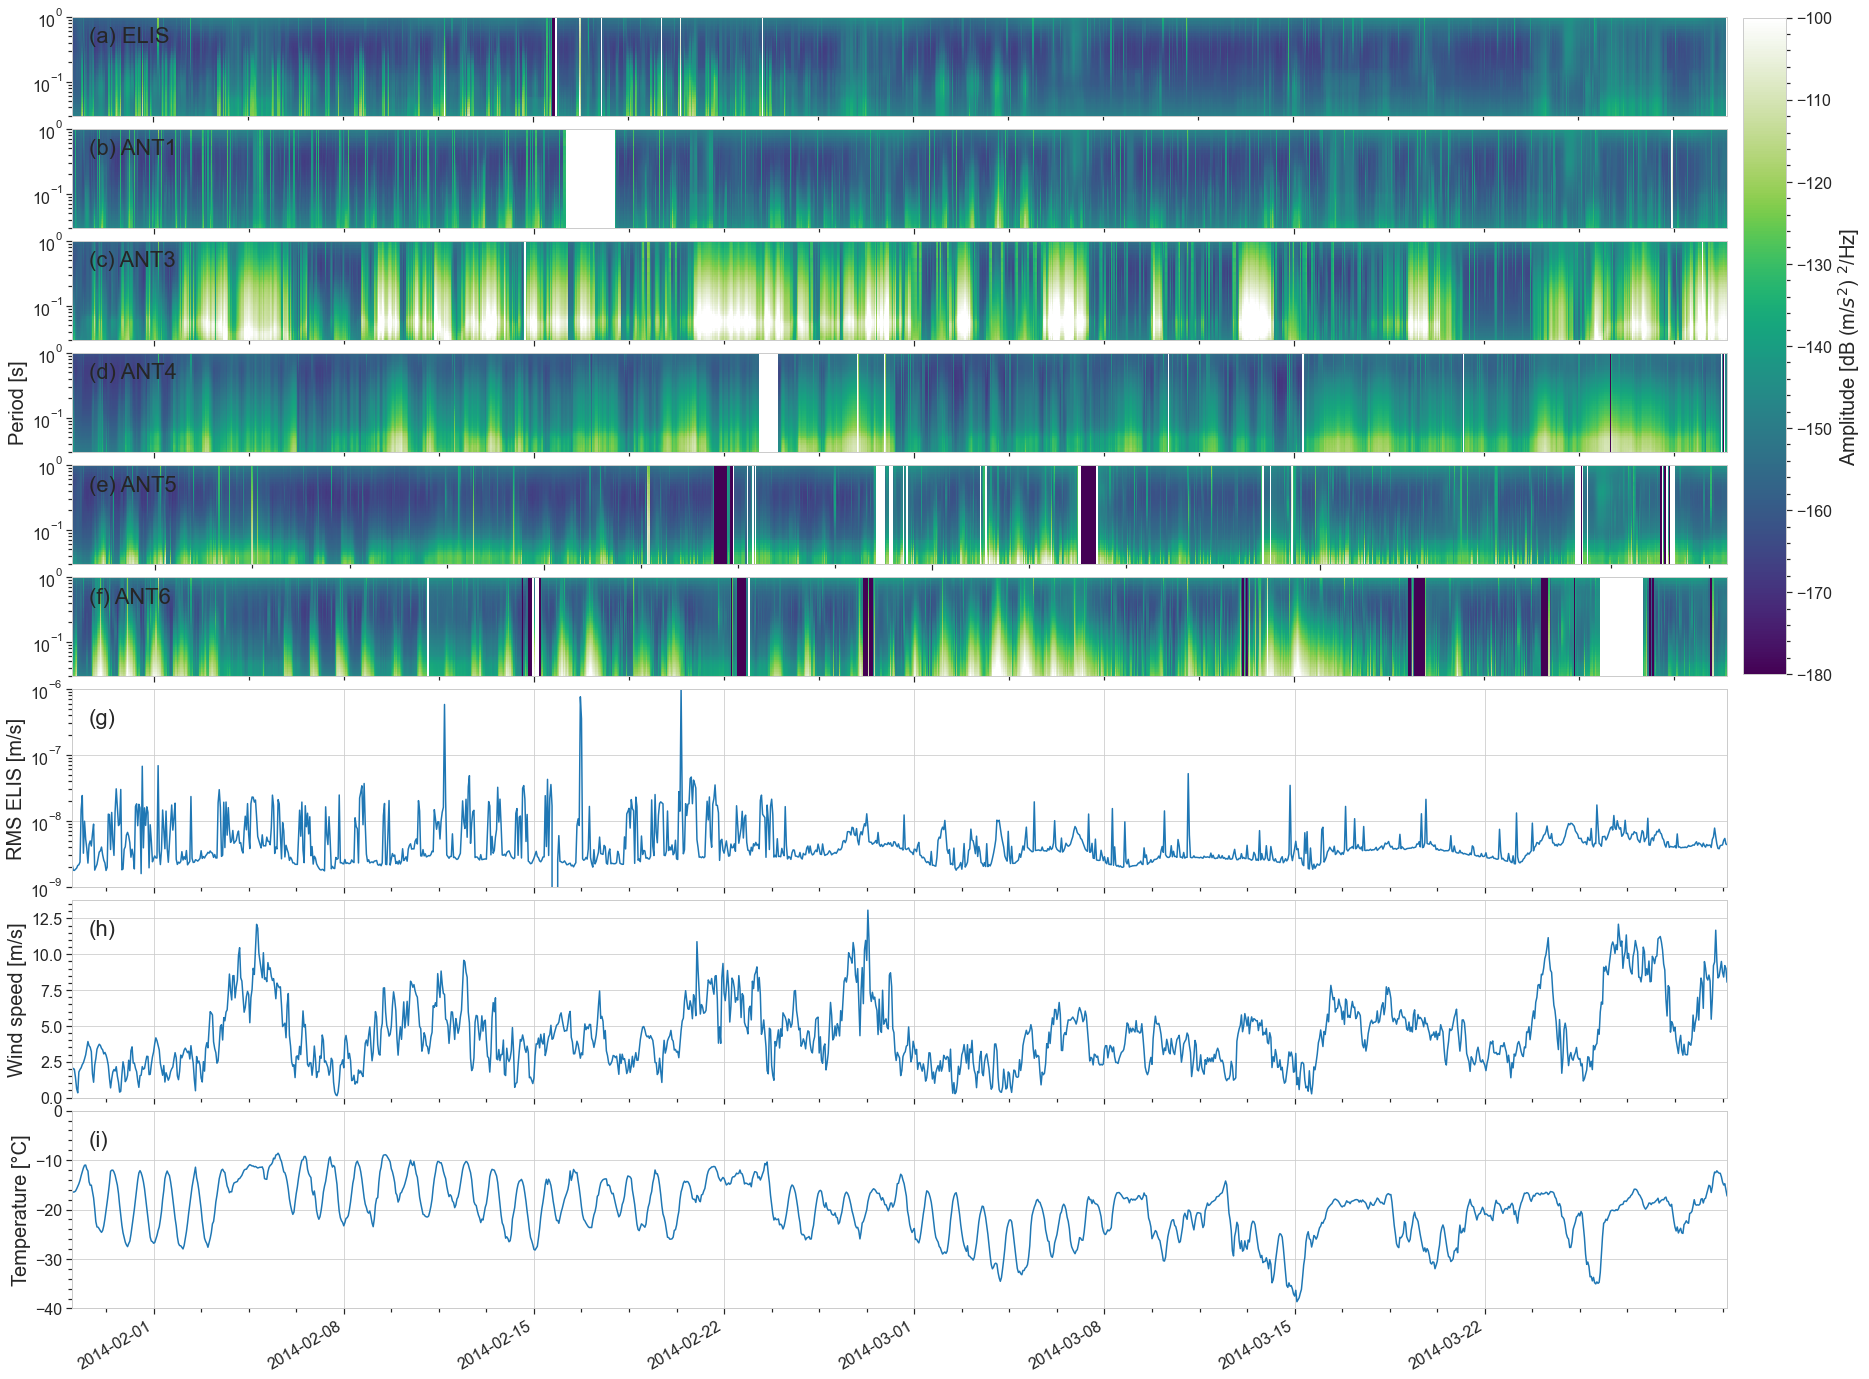

In [88]:
#fig = plt.figure(figsize=(16,12))

fig, axes = plt.subplots(9, 1, sharey=False, sharex=True, squeeze=True)

gs = gridspec.GridSpec(9, 1, height_ratios=[1, 1, 1, 1, 1, 1, 2, 2, 2]) 



velocity_spectrum_ELIS = []
velocity_spectrum_ANT1 = []
velocity_spectrum_ANT3 = []
velocity_spectrum_ANT4 = []
velocity_spectrum_ANT5 = []
velocity_spectrum_ANT6 = []

noise = [ELIS, ANT1, ANT3,ANT4, ANT5, ANT6]

images = [ELIS_HHZ, ANT1_HHZ, ANT3_HHZ,ANT4_HHZ, ANT5_HHZ, ANT6_HHZ]

data_index = [ELIS_index, ANT1_index, ANT3_index, ANT4_index, ANT5_index, ANT6_index]

vel_list = [velocity_spectrum_ELIS,velocity_spectrum_ANT1,velocity_spectrum_ANT3,velocity_spectrum_ANT4,velocity_spectrum_ANT5,velocity_spectrum_ANT6]

first_titles = ['(a)','(b)','(c)','(d)','(e)','(f)','(g)']

second_titles = ['ELIS HHZ', 'ANT1 HHZ', 'ANT3 HHZ','ANT4 HHZ', 'ANT5 HHZ', 'ANT6 HHZ', 'RMS']

third_titles = ['ELIS', 'ANT1', 'ANT3','ANT4', 'ANT5', 'ANT6']

axes[0] = plt.subplot(gs[0])

axes[1] = plt.subplot(gs[1])

axes[2] = plt.subplot(gs[2])

axes[3] = plt.subplot(gs[3])

axes[4] = plt.subplot(gs[4])

axes[5] = plt.subplot(gs[5])

axes[6] = plt.subplot(gs[6])

axes[7] = plt.subplot(gs[7])

axes[8] = plt.subplot(gs[8])


ncol = 1

nrow = 6


for i in range(nrow):

    computed_data = noise[i]

    ppsd = images[i]

    clim = [-190, -90]

    cmap = viridis_white

    grid = None

    filename= None#'PNG/29January_30March2014/ANT6_HHZ_spec_22.01.2020.png'

    show=True

    letter = first_titles[i]

    title = second_titles[i]

    title_bis = third_titles[i]
    
    velocity_list = vel_list[i]
    
    d_index = data_index[i]

    if letter == '(a)':

        dates_difference = computed_data

        yedges = ppsd.period_xedges

        times = []
        for g in range(len(dates_difference.T.index)):
            time = UTCDateTime(dates_difference.T.index[g])
            times.append(time)
        xedges = [t.matplotlib_date for t in times] + \
            [(times[-1] + ppsd.step).matplotlib_date]
        meshgrid_x, meshgrid_y = np.meshgrid(xedges, yedges)

        pc = axes[i].pcolormesh(meshgrid_x,meshgrid_y,dates_difference.values.astype('float'),  cmap=viridis_white,vmin=-180,vmax=-100)
        #fig.colorbar(pc, label='Amplitude [$\mathdefault{m^2/s^4/Hz}$][dB]')

        fig.autofmt_xdate()
        _set_xaxis_obspy_dates(axes[i])

        axes[i].set_yscale("log")
        axes[i].set_xlim(ppsd.times_processed[0].matplotlib_date,
                    (ppsd.times_processed[-1] + ppsd.step).matplotlib_date)

        #ax.set_xlim(0,1462)
        axes[i].set_ylim(0.03,1)

        axes[i].set_yscale('log')

        #ax.set_xlabel('Time')
        
        #axes[i].text(10, 0.9, letter,transform=axes[i].transAxes, ha="left")
        
        #axes[i].text(10, 0.9, title,transform=axes[i].transAxes, ha="center")
        
        axes[i].text(0.01, 0.9, str(letter) + ' ' + str(title_bis),
        horizontalalignment='left',
        verticalalignment='top',
        transform=axes[i].transAxes, fontsize = 22)

        #axes[i].set_title(str(letter) + str(title_bis), fontsize=20, fontweight="normal", loc='left')


        #axes[i].set_title(title, fontsize=20, fontweight="normal", loc='center')


        fig.tight_layout()
        
        def rms(s, f):
            return np.sqrt(np.trapz(s, f))

        freqs = [(1.0,50.0)]

        per = ppsd.period_bin_centers

        velocity_spectrum = []
        for psd in computed_data.T.values:
            RMS = {}
            for fmin, fmax in freqs:
                ix = np.where((per>=1.0/fmax) & (per<=1.0/fmin))

                spec = psd.copy()[ix][::-1]
                f = 1.0/per.copy()[ix][::-1]

                # remove NaNs from the list
                valid = np.where(np.isfinite(spec))[0]
                spec = spec[valid]
                f = f[valid]

                w2f = (2.0 * np.pi * f)

                amp = 10.0**(spec/10.) / w2f**2

                RMS["%.1f-%.1f"%(fmin, fmax)] = rms(amp, f)

            velocity_spectrum.append(RMS)

        index = pd.DatetimeIndex([d.datetime for d in d_index])
        exec(f'cat_{i} = pd.DataFrame(velocity_spectrum, index=index)')

    else:

        import datetime

        dates_difference =  computed_data

        yedges = ppsd.period_xedges

        times = []
        for g in range(len(dates_difference.T.index)):
            time = UTCDateTime(dates_difference.T.index[g])
            times.append(time)
        xedges = [t.matplotlib_date for t in times] + \
            [(times[-1] + ppsd.step).matplotlib_date]
        meshgrid_x, meshgrid_y = np.meshgrid(xedges, yedges)

        pc = axes[i].pcolormesh(meshgrid_x,meshgrid_y,dates_difference.values.astype('float'),  cmap=viridis_white,vmin=-180,vmax=-100)
        #fig.colorbar(pc, label='Amplitude [$\mathdefault{m^2/s^4/Hz}$][dB]')

        fig.autofmt_xdate()
        _set_xaxis_obspy_dates(axes[i])

        axes[i].set_yscale("log")
        axes[i].set_xlim(ppsd.times_processed[0].matplotlib_date,
                    (ppsd.times_processed[-1] + ppsd.step).matplotlib_date)

        #ax.set_xlim(0,1462)
        axes[i].set_ylim(0.03,1)

        axes[i].set_yscale('log')
        
        #locmin = mtick.LogLocator(base=10.0,subs=(0.2,0.4,0.6,0.8),numticks=12)
        #axes[i].yaxis.set_minor_locator(locmin)
        #axes[i].yaxis.set_minor_formatter(mtick.NullFormatter())

        #ax.set_xlabel('Time')
        
        
        axes[i].text(0.01, 0.9, str(letter) + ' ' + str(title_bis),
        horizontalalignment='left',
        verticalalignment='top',
        transform=axes[i].transAxes, fontsize = 22)

        #axes[i].set_title(str(letter) + str(title_bis), fontsize=20, fontweight="normal", loc='left')


        #axes[i].set_title(title, fontsize=20, fontweight="normal", loc='center')
        
        def rms(s, f):
            return np.sqrt(np.trapz(s, f))

        freqs = [(1.0,50.0)]

        per = ppsd.period_bin_centers


        velocity_spectrum = []
        for psd in computed_data.T.values:
            RMS = {}
            for fmin, fmax in freqs:
                ix = np.where((per>=1.0/fmax) & (per<=1.0/fmin))

                spec = psd.copy()[ix][::-1]
                f = 1.0/per.copy()[ix][::-1]

                # remove NaNs from the list
                valid = np.where(np.isfinite(spec))[0]
                spec = spec[valid]
                f = f[valid]

                w2f = (2.0 * np.pi * f)

                amp = 10.0**(spec/10.) / w2f**2

                RMS["%.1f-%.1f"%(fmin, fmax)] = rms(amp, f)

            velocity_spectrum.append(RMS)

        index = pd.DatetimeIndex([d.datetime for d in d_index])
        exec(f'cat_{i} = pd.DataFrame(velocity_spectrum, index=index)')


        fig.tight_layout()
        


t = cat_0['1.0-50.0'] <= 0.0000016
y = cat_0['1.0-50.0'] > 0.0000001

axes[6].plot(cat_0['1.0-50.0'][t], label='ELIS')

#axes[6].yaxis.set_major_formatter(mtick.FormatStrFormatter('%.0e'))





cax = plt.axes([1, 0.5, 0.025, 0.48])
cb = plt.colorbar(pc, cax=cax,aspect=10)
axes[3].set_ylabel('Period [s]', fontsize=20)

axes[7].plot(df.index, df['HWSavg[m/s]'], label='Average Wind Speed')

axes[8].plot(df.index, df2['Temperature'], label='Temperature')

axes[8].set_ylabel('Temperature [°C]', fontsize=20)

axes[7].set_ylabel('Wind speed [m/s]', fontsize=20)


axes[6].set_xlim(df.index[0],df.index[1462])

axes[7].set_xlim(df.index[0],df.index[1462])

axes[8].set_xlim(df.index[0],df.index[1462])



axes[8].set_ylim([-40,0])


#axes[6].set_yscale('log')

axes[7].set_ylim([0,13.8])


import matplotlib.ticker as ticker
scale = 1e6
ticks = ticker.FuncFormatter(lambda x, posd:'{0:g}'.format(x*scale))



axes[6].yaxis.set_major_formatter(ticks)

axes[6].set_yscale( "log")

axes[6].set_ylim([1e-09,1e-06])

axes[6].set_ylabel('RMS ELIS [m/s]', fontsize=20)

#lgd = axes[6].legend(fontsize=18,loc="upper left", ncol=6)

axes[6].text(0.01, 0.9, '(g)',
horizontalalignment='left',
verticalalignment='top',
transform=axes[6].transAxes, fontsize = 22)

axes[7].text(0.01, 0.9, '(h)',
horizontalalignment='left',
verticalalignment='top',
transform=axes[7].transAxes, fontsize = 22)

axes[8].text(0.01, 0.9, '(i)',
horizontalalignment='left',
verticalalignment='top',
transform=axes[8].transAxes, fontsize = 22)


ymin, ymax = axes[6].get_ylim()


#fig.text(0.425, 0.004, 'Datetime', ha='center', va='center',fontsize=25)

cb.ax.set_ylabel('Amplitude [dB (m/$s^2$) $^2$/Hz]', fontweight='normal', fontsize=20)

plt.subplots_adjust(hspace=0.1, wspace=2)


In [89]:
fig.savefig('Figure6_RMSELIS_with_wind_and_wind_speed_and_temperature.14.08.2021.jpeg', bbox_extra_artists=(lgd,), bbox_inches='tight')

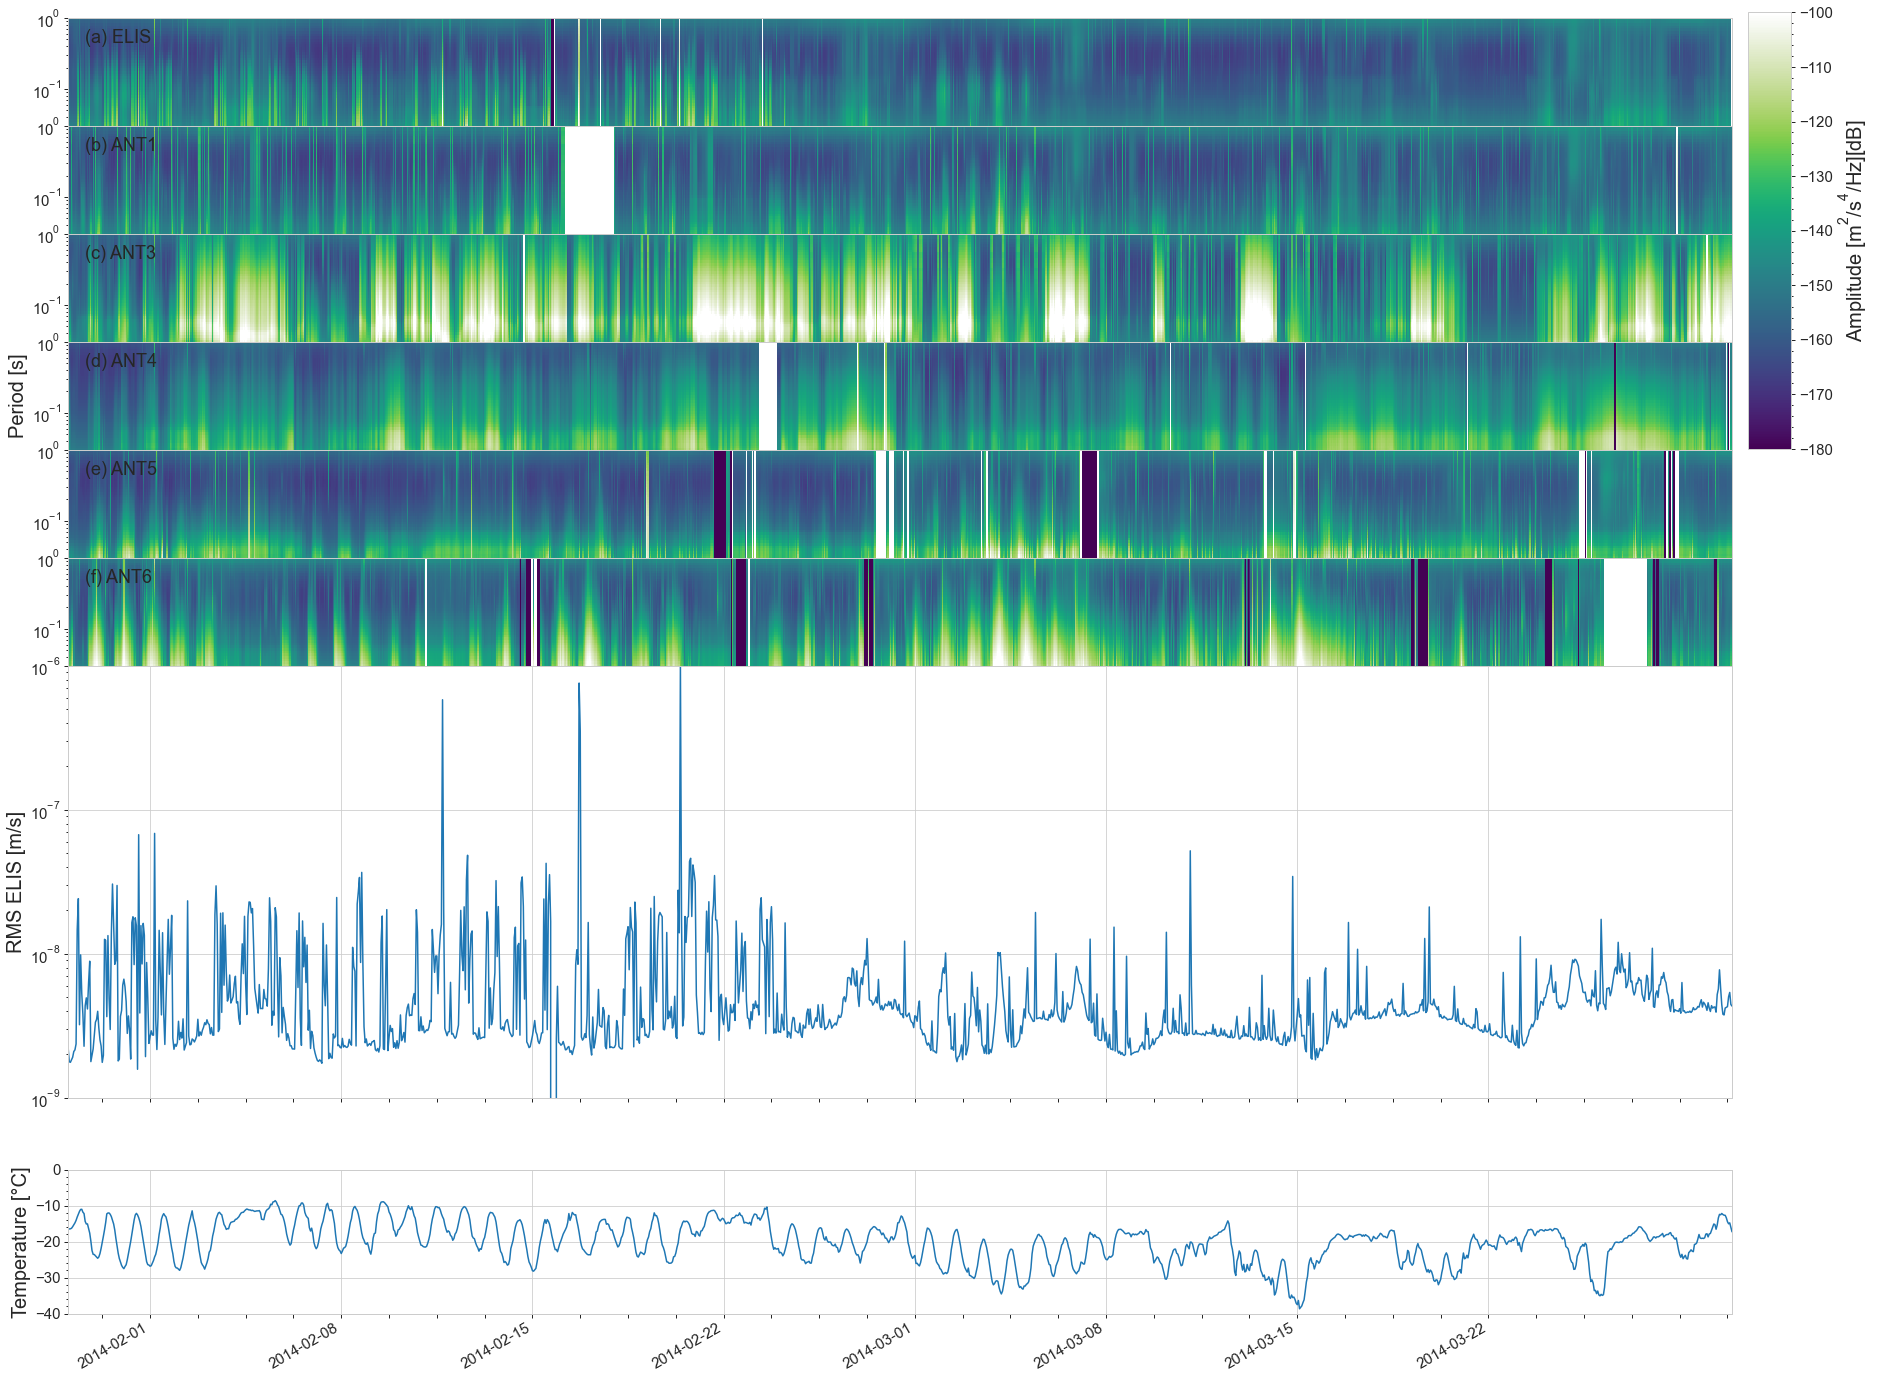

In [48]:
#fig = plt.figure(figsize=(16,12))

fig, axes = plt.subplots(9, 1, sharey=False, sharex=True, squeeze=True)

gs = gridspec.GridSpec(9, 1, height_ratios=[1, 1, 1, 1, 1, 1, 4,1,1]) 



velocity_spectrum_ELIS = []
velocity_spectrum_ANT1 = []
velocity_spectrum_ANT3 = []
velocity_spectrum_ANT4 = []
velocity_spectrum_ANT5 = []
velocity_spectrum_ANT6 = []

noise = [ELIS, ANT1, ANT3,ANT4, ANT5, ANT6]

images = [ELIS_HHZ, ANT1_HHZ, ANT3_HHZ,ANT4_HHZ, ANT5_HHZ, ANT6_HHZ]

data_index = [ELIS_index, ANT1_index, ANT3_index, ANT4_index, ANT5_index, ANT6_index]

vel_list = [velocity_spectrum_ELIS,velocity_spectrum_ANT1,velocity_spectrum_ANT3,velocity_spectrum_ANT4,velocity_spectrum_ANT5,velocity_spectrum_ANT6]

first_titles = ['(a)','(b)','(c)','(d)','(e)','(f)','(g)']

second_titles = ['ELIS HHZ', 'ANT1 HHZ', 'ANT3 HHZ','ANT4 HHZ', 'ANT5 HHZ', 'ANT6 HHZ', 'RMS']

third_titles = ['ELIS', 'ANT1', 'ANT3','ANT4', 'ANT5', 'ANT6']

axes[0] = plt.subplot(gs[0])

axes[1] = plt.subplot(gs[1])

axes[2] = plt.subplot(gs[2])

axes[3] = plt.subplot(gs[3])

axes[4] = plt.subplot(gs[4])

axes[5] = plt.subplot(gs[5])

axes[6] = plt.subplot(gs[6])


ncol = 1

nrow = 6


for i in range(nrow):

    computed_data = noise[i]

    ppsd = images[i]

    clim = [-190, -90]

    cmap = viridis_white

    grid = None

    filename= None#'PNG/29January_30March2014/ANT6_HHZ_spec_22.01.2020.png'

    show=True

    letter = first_titles[i]

    title = second_titles[i]

    title_bis = third_titles[i]
    
    velocity_list = vel_list[i]
    
    d_index = data_index[i]

    if letter == '(a)':

        dates_difference = computed_data

        yedges = ppsd.period_xedges

        times = []
        for g in range(len(dates_difference.T.index)):
            time = UTCDateTime(dates_difference.T.index[g])
            times.append(time)
        xedges = [t.matplotlib_date for t in times] + \
            [(times[-1] + ppsd.step).matplotlib_date]
        meshgrid_x, meshgrid_y = np.meshgrid(xedges, yedges)

        pc = axes[i].pcolormesh(meshgrid_x,meshgrid_y,dates_difference.values.astype('float'),  cmap=viridis_white,vmin=-180,vmax=-100)
        #fig.colorbar(pc, label='Amplitude [$\mathdefault{m^2/s^4/Hz}$][dB]')

        fig.autofmt_xdate()
        _set_xaxis_obspy_dates(axes[i])

        axes[i].set_yscale("log")
        axes[i].set_xlim(ppsd.times_processed[0].matplotlib_date,
                    (ppsd.times_processed[-1] + ppsd.step).matplotlib_date)

        #ax.set_xlim(0,1462)
        axes[i].set_ylim(0.03,1)

        axes[i].set_yscale('log')

        #ax.set_xlabel('Time')
        
        #axes[i].text(10, 0.9, letter,transform=axes[i].transAxes, ha="left")
        
        #axes[i].text(10, 0.9, title,transform=axes[i].transAxes, ha="center")
        
        axes[i].text(0.01, 0.9, str(letter) + ' ' + str(title_bis),
        horizontalalignment='left',
        verticalalignment='top',
        transform=axes[i].transAxes, fontsize = 18)

        #axes[i].set_title(str(letter) + str(title_bis), fontsize=20, fontweight="normal", loc='left')


        #axes[i].set_title(title, fontsize=20, fontweight="normal", loc='center')


        fig.tight_layout()
        
        def rms(s, f):
            return np.sqrt(np.trapz(s, f))

        freqs = [(1.0,50.0)]

        per = ppsd.period_bin_centers

        velocity_spectrum = []
        for psd in computed_data.T.values:
            RMS = {}
            for fmin, fmax in freqs:
                ix = np.where((per>=1.0/fmax) & (per<=1.0/fmin))

                spec = psd.copy()[ix][::-1]
                f = 1.0/per.copy()[ix][::-1]

                # remove NaNs from the list
                valid = np.where(np.isfinite(spec))[0]
                spec = spec[valid]
                f = f[valid]

                w2f = (2.0 * np.pi * f)

                amp = 10.0**(spec/10.) / w2f**2

                RMS["%.1f-%.1f"%(fmin, fmax)] = rms(amp, f)

            velocity_spectrum.append(RMS)

        index = pd.DatetimeIndex([d.datetime for d in d_index])
        exec(f'cat_{i} = pd.DataFrame(velocity_spectrum, index=index)')

    else:

        import datetime

        dates_difference =  computed_data

        yedges = ppsd.period_xedges

        times = []
        for g in range(len(dates_difference.T.index)):
            time = UTCDateTime(dates_difference.T.index[g])
            times.append(time)
        xedges = [t.matplotlib_date for t in times] + \
            [(times[-1] + ppsd.step).matplotlib_date]
        meshgrid_x, meshgrid_y = np.meshgrid(xedges, yedges)

        pc = axes[i].pcolormesh(meshgrid_x,meshgrid_y,dates_difference.values.astype('float'),  cmap=viridis_white,vmin=-180,vmax=-100)
        #fig.colorbar(pc, label='Amplitude [$\mathdefault{m^2/s^4/Hz}$][dB]')

        fig.autofmt_xdate()
        _set_xaxis_obspy_dates(axes[i])

        axes[i].set_yscale("log")
        axes[i].set_xlim(ppsd.times_processed[0].matplotlib_date,
                    (ppsd.times_processed[-1] + ppsd.step).matplotlib_date)

        #ax.set_xlim(0,1462)
        axes[i].set_ylim(0.03,1)

        axes[i].set_yscale('log')
        
        #locmin = mtick.LogLocator(base=10.0,subs=(0.2,0.4,0.6,0.8),numticks=12)
        #axes[i].yaxis.set_minor_locator(locmin)
        #axes[i].yaxis.set_minor_formatter(mtick.NullFormatter())

        #ax.set_xlabel('Time')
        
        
        axes[i].text(0.01, 0.9, str(letter) + ' ' + str(title_bis),
        horizontalalignment='left',
        verticalalignment='top',
        transform=axes[i].transAxes, fontsize = 18)

        #axes[i].set_title(str(letter) + str(title_bis), fontsize=20, fontweight="normal", loc='left')


        #axes[i].set_title(title, fontsize=20, fontweight="normal", loc='center')
        

        


        def rms(s, f):
            return np.sqrt(np.trapz(s, f))

        freqs = [(1.0,50.0)]

        per = ppsd.period_bin_centers


        velocity_spectrum = []
        for psd in computed_data.T.values:
            RMS = {}
            for fmin, fmax in freqs:
                ix = np.where((per>=1.0/fmax) & (per<=1.0/fmin))

                spec = psd.copy()[ix][::-1]
                f = 1.0/per.copy()[ix][::-1]

                # remove NaNs from the list
                valid = np.where(np.isfinite(spec))[0]
                spec = spec[valid]
                f = f[valid]

                w2f = (2.0 * np.pi * f)

                amp = 10.0**(spec/10.) / w2f**2

                RMS["%.1f-%.1f"%(fmin, fmax)] = rms(amp, f)

            velocity_spectrum.append(RMS)

        index = pd.DatetimeIndex([d.datetime for d in d_index])
        exec(f'cat_{i} = pd.DataFrame(velocity_spectrum, index=index)')


        fig.tight_layout()
        


t = cat_0['1.0-50.0'] <= 0.0000016
y = cat_0['1.0-50.0'] > 0.0000001

axes[6].plot(cat_0['1.0-50.0'][t], label='ELIS')

#axes[6].yaxis.set_major_formatter(mtick.FormatStrFormatter('%.0e'))





cax = plt.axes([1, 0.666, 0.025, 0.319])
cb = plt.colorbar(pc, cax=cax,aspect=10)
axes[3].set_ylabel('Period [s]', fontsize=20)

axes[7].plot(df.index, df['HWSavg[m/s]'], label='Average Wind Speed')

axes[8].plot(df.index, df2['Temperature'], label='Temperature')

axes[8].set_ylabel('Temperature [°C]', fontsize=20)

axes[7].set_ylabel('Wind speed [m/s]', fontsize=20)


axes[6].set_xlim(df.index[0],df.index[1462])

axes[7].set_xlim(df.index[0],df.index[1462])

axes[8].set_xlim(df.index[0],df.index[1462])



axes[8].set_ylim([-40,0])


#axes[6].set_yscale('log')

axes[7].set_ylim([0,13.8])


import matplotlib.ticker as ticker
scale = 1e6
ticks = ticker.FuncFormatter(lambda x, posd:'{0:g}'.format(x*scale))



axes[6].yaxis.set_major_formatter(ticks)

axes[6].set_yscale( "log")

axes[6].set_ylim([1e-09,1e-06])

axes[6].set_ylabel('RMS ELIS [m/s]', fontsize=20)

#lgd = axes[6].legend(fontsize=18,loc="upper left", ncol=6)


ymin, ymax = axes[6].get_ylim()


#fig.text(0.425, 0.004, 'Datetime', ha='center', va='center',fontsize=25)

cb.ax.set_ylabel('Amplitude [$\mathdefault{m^2/s^4/Hz}$][dB]', fontweight='normal', fontsize=20)

plt.subplots_adjust(hspace=0, wspace=2)


0
yes
1
2
3
4
5


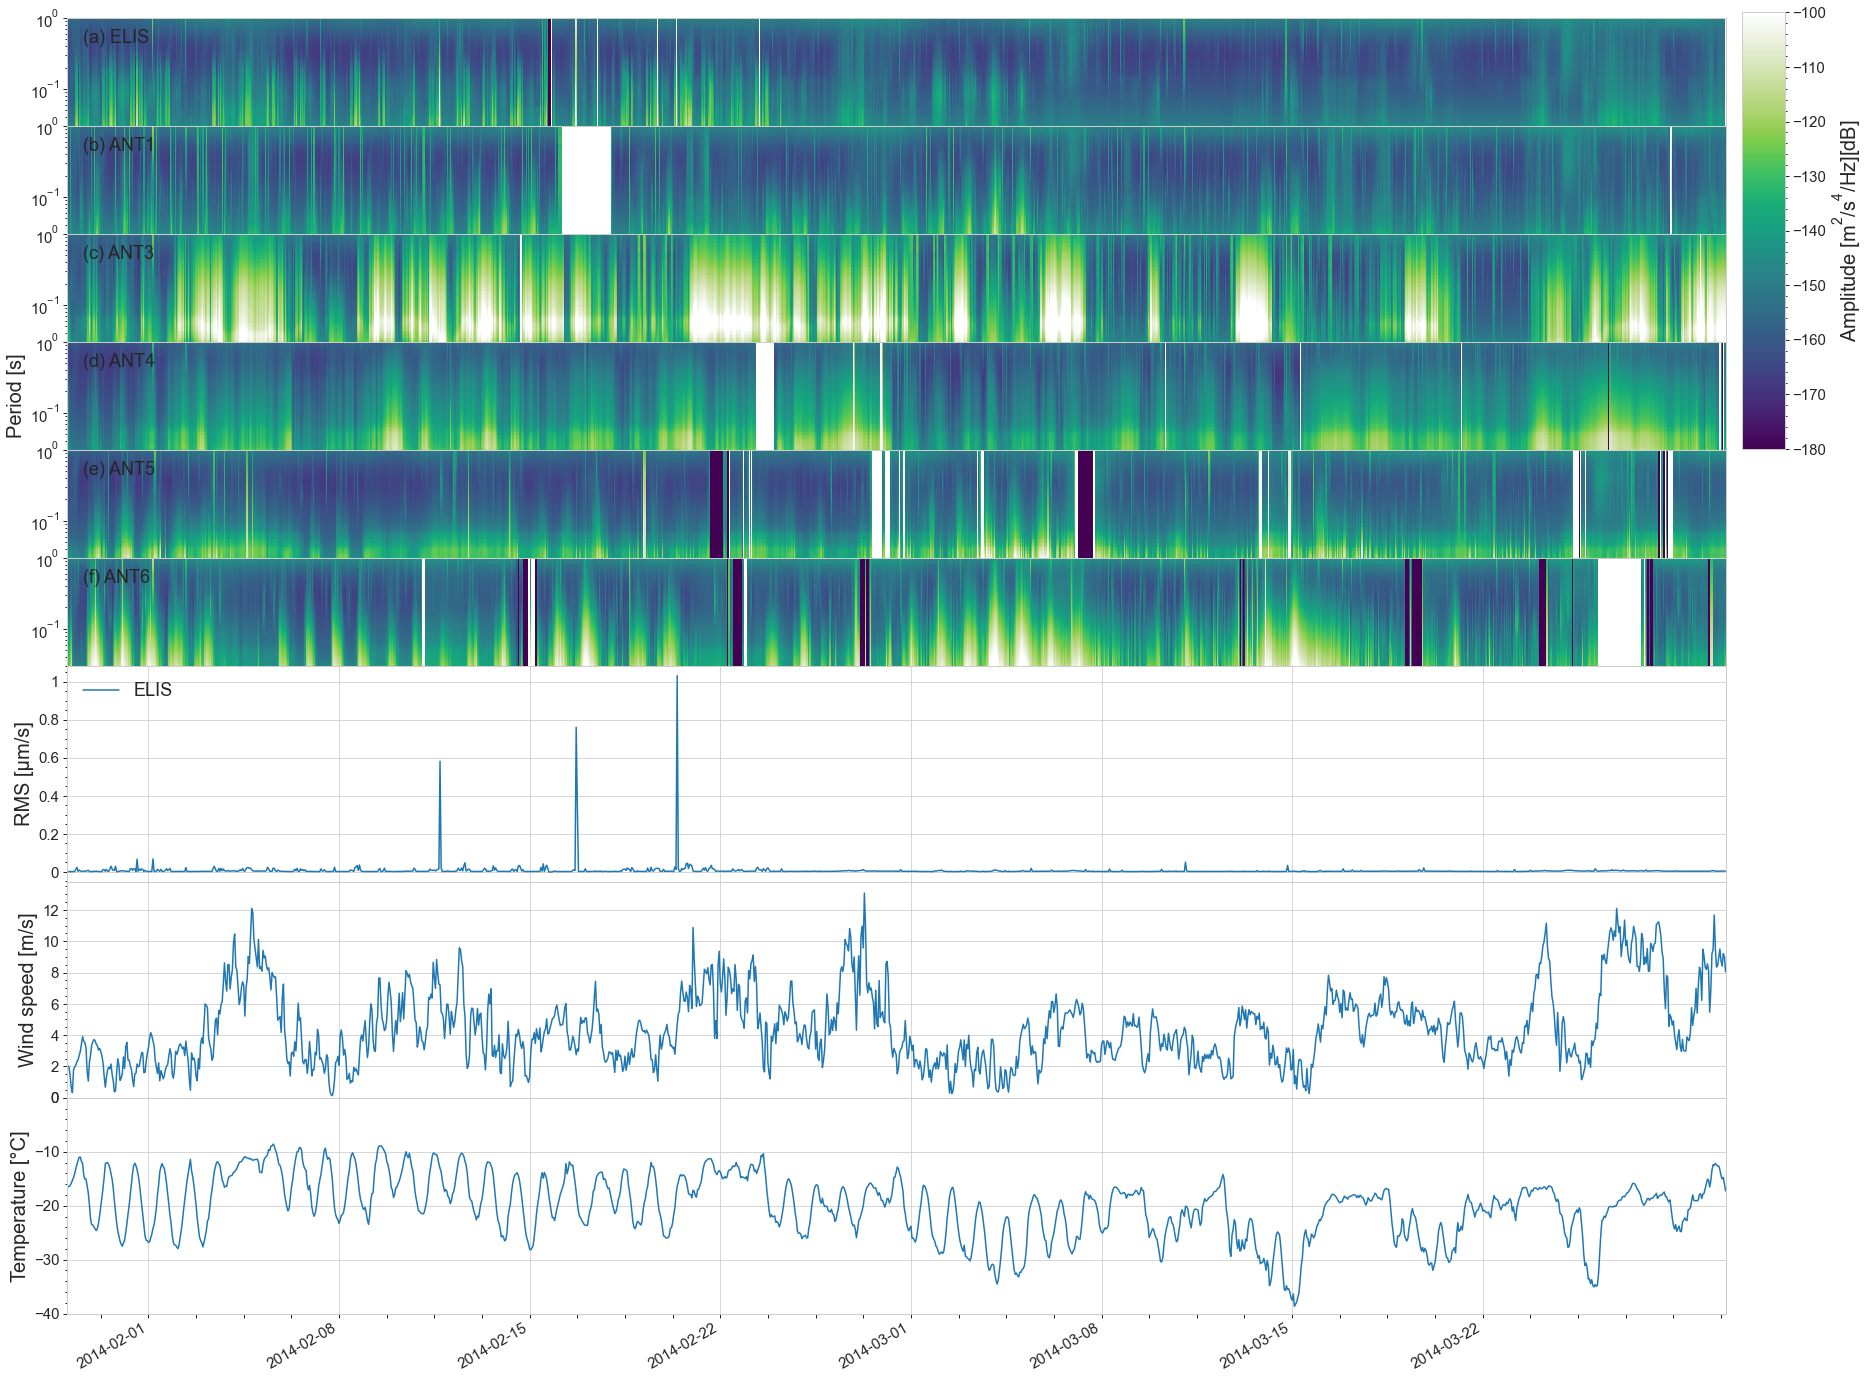

In [49]:
#Figure With RMS only ELIS and wind speed and Temperature

#fig = plt.figure(figsize=(16,12))

fig, axes = plt.subplots(9, 1, sharey=False, sharex=True, squeeze=True)

gs = gridspec.GridSpec(9, 1, height_ratios=[2, 2, 2, 2, 2, 2, 4, 4, 4]) 



velocity_spectrum_ELIS = []
velocity_spectrum_ANT1 = []
velocity_spectrum_ANT3 = []
velocity_spectrum_ANT4 = []
velocity_spectrum_ANT5 = []
velocity_spectrum_ANT6 = []

noise = [ELIS, ANT1, ANT3,ANT4, ANT5, ANT6]

images = [ELIS_HHZ, ANT1_HHZ, ANT3_HHZ,ANT4_HHZ, ANT5_HHZ, ANT6_HHZ]

data_index = [ELIS_index, ANT1_index, ANT3_index, ANT4_index, ANT5_index, ANT6_index]

vel_list = [velocity_spectrum_ELIS,velocity_spectrum_ANT1,velocity_spectrum_ANT3,velocity_spectrum_ANT4,velocity_spectrum_ANT5,velocity_spectrum_ANT6]

first_titles = ['(a)','(b)','(c)','(d)','(e)','(f)','(g)']

second_titles = ['ELIS HHZ', 'ANT1 HHZ', 'ANT3 HHZ','ANT4 HHZ', 'ANT5 HHZ', 'ANT6 HHZ', 'RMS']

third_titles = ['ELIS', 'ANT1', 'ANT3','ANT4', 'ANT5', 'ANT6']

axes[0] = plt.subplot(gs[0])

axes[1] = plt.subplot(gs[1])

axes[2] = plt.subplot(gs[2])

axes[3] = plt.subplot(gs[3])

axes[4] = plt.subplot(gs[4])

axes[5] = plt.subplot(gs[5])

axes[6] = plt.subplot(gs[6])

axes[7] = plt.subplot(gs[7])

axes[8] = plt.subplot(gs[8])


ncol = 1

nrow = 6


for i in range(nrow):
    
    print(i)

    computed_data = noise[i]

    ppsd = images[i]

    clim = [-190, -90]

    cmap = viridis_white

    grid = None

    filename= None#'PNG/29January_30March2014/ANT6_HHZ_spec_22.01.2020.png'

    show=True

    letter = first_titles[i]

    title = second_titles[i]

    title_bis = third_titles[i]
    
    velocity_list = vel_list[i]
    
    d_index = data_index[i]

    if letter == '(a)':
        
        print('yes')

        dates_difference = computed_data

        yedges = ppsd.period_xedges

        times = []
        for g in range(len(dates_difference.T.index)):
            time = UTCDateTime(dates_difference.T.index[g])
            times.append(time)
        xedges = [t.matplotlib_date for t in times] + \
            [(times[-1] + ppsd.step).matplotlib_date]
        meshgrid_x, meshgrid_y = np.meshgrid(xedges, yedges)

        pc = axes[i].pcolormesh(meshgrid_x,meshgrid_y,dates_difference.values.astype('float'),  cmap=viridis_white,vmin=-180,vmax=-100)
        #fig.colorbar(pc, label='Amplitude [$\mathdefault{m^2/s^4/Hz}$][dB]')

        fig.autofmt_xdate()
        _set_xaxis_obspy_dates(axes[i])

        axes[i].set_yscale("log")
        axes[i].set_xlim(ppsd.times_processed[0].matplotlib_date,
                    (ppsd.times_processed[-1] + ppsd.step).matplotlib_date)

        #ax.set_xlim(0,1462)
        axes[i].set_ylim(0.03,1)

        axes[i].set_yscale('log')

        #ax.set_xlabel('Time')
        
        #axes[i].text(10, 0.9, letter,transform=axes[i].transAxes, ha="left")
        
        #axes[i].text(10, 0.9, title,transform=axes[i].transAxes, ha="center")
        
        axes[i].text(0.01, 0.9, str(letter) + ' ' + str(title_bis),
        horizontalalignment='left',
        verticalalignment='top',
        transform=axes[i].transAxes, fontsize = 18)

        #axes[i].set_title(str(letter) + str(title_bis), fontsize=20, fontweight="normal", loc='left')


        #axes[i].set_title(title, fontsize=20, fontweight="normal", loc='center')


        fig.tight_layout()
        
        def rms(s, f):
            return np.sqrt(np.trapz(s, f))

        freqs = [(1.0,50.0)]

        per = ppsd.period_bin_centers

        velocity_spectrum = []
        for psd in computed_data.T.values:
            RMS = {}
            for fmin, fmax in freqs:
                ix = np.where((per>=1.0/fmax) & (per<=1.0/fmin))

                spec = psd.copy()[ix][::-1]
                f = 1.0/per.copy()[ix][::-1]

                # remove NaNs from the list
                valid = np.where(np.isfinite(spec))[0]
                spec = spec[valid]
                f = f[valid]

                w2f = (2.0 * np.pi * f)

                amp = 10.0**(spec/10.) / w2f**2

                RMS["%.1f-%.1f"%(fmin, fmax)] = rms(amp, f)

            velocity_spectrum.append(RMS)
        index = pd.DatetimeIndex([d.datetime for d in d_index])
        exec(f'cat_{i} = pd.DataFrame(velocity_spectrum, index=index)')


        fig.tight_layout()   



    else:

        import datetime

        dates_difference =  computed_data

        yedges = ppsd.period_xedges

        times = []
        for g in range(len(dates_difference.T.index)):
            time = UTCDateTime(dates_difference.T.index[g])
            times.append(time)
        xedges = [t.matplotlib_date for t in times] + \
            [(times[-1] + ppsd.step).matplotlib_date]
        meshgrid_x, meshgrid_y = np.meshgrid(xedges, yedges)

        pc = axes[i].pcolormesh(meshgrid_x,meshgrid_y,dates_difference.values.astype('float'),  cmap=viridis_white,vmin=-180,vmax=-100)
        #fig.colorbar(pc, label='Amplitude [$\mathdefault{m^2/s^4/Hz}$][dB]')

        fig.autofmt_xdate()
        _set_xaxis_obspy_dates(axes[i])

        axes[i].set_yscale("log")
        axes[i].set_xlim(ppsd.times_processed[0].matplotlib_date,
                    (ppsd.times_processed[-1] + ppsd.step).matplotlib_date)

        #ax.set_xlim(0,1462)
        axes[i].set_ylim(0.03,1)

        axes[i].set_yscale('log')
        
        #locmin = mtick.LogLocator(base=10.0,subs=(0.2,0.4,0.6,0.8),numticks=12)
        #axes[i].yaxis.set_minor_locator(locmin)
        #axes[i].yaxis.set_minor_formatter(mtick.NullFormatter())

        #ax.set_xlabel('Time')
        
        
        axes[i].text(0.01, 0.9, str(letter) + ' ' + str(title_bis),
        horizontalalignment='left',
        verticalalignment='top',
        transform=axes[i].transAxes, fontsize = 18)

        #axes[i].set_title(str(letter) + str(title_bis), fontsize=20, fontweight="normal", loc='left')


        #axes[i].set_title(title, fontsize=20, fontweight="normal", loc='center')
        
        def rms(s, f):
            return np.sqrt(np.trapz(s, f))

        freqs = [(1.0,50.0)]

        per = ppsd.period_bin_centers


        velocity_spectrum = []
        for psd in computed_data.T.values:
            RMS = {}
            for fmin, fmax in freqs:
                ix = np.where((per>=1.0/fmax) & (per<=1.0/fmin))

                spec = psd.copy()[ix][::-1]
                f = 1.0/per.copy()[ix][::-1]

                # remove NaNs from the list
                valid = np.where(np.isfinite(spec))[0]
                spec = spec[valid]
                f = f[valid]

                w2f = (2.0 * np.pi * f)

                amp = 10.0**(spec/10.) / w2f**2

                RMS["%.1f-%.1f"%(fmin, fmax)] = rms(amp, f)

            velocity_spectrum.append(RMS)

        index = pd.DatetimeIndex([d.datetime for d in d_index])
        exec(f'cat_{i} = pd.DataFrame(velocity_spectrum, index=index)')


        fig.tight_layout()
        


t = cat_0['1.0-50.0'] <= 0.0000016
y = cat_0['1.0-50.0'] > 0.0000001

axes[6].plot(cat_0['1.0-50.0'][t], label='ELIS')



#axes[6].yaxis.set_major_formatter(mtick.FormatStrFormatter('%.0e'))





cax = plt.axes([1, 0.666, 0.025, 0.319])
cb = plt.colorbar(pc, cax=cax,aspect=10)
axes[3].set_ylabel('Period [s]', fontsize=20)

axes[7].plot(df.index, df['HWSavg[m/s]'], label='Average Wind Speed')

axes[8].plot(df.index, df2['Temperature'], label='Temperature')

axes[8].set_ylabel('Temperature [°C]', fontsize=20)

axes[7].set_ylabel('Wind speed [m/s]', fontsize=20)


axes[6].set_xlim(df.index[0],df.index[1462])

axes[7].set_xlim(df.index[0],df.index[1462])

axes[8].set_xlim(df.index[0],df.index[1462])

axes[8].set_ylim([-40,0])


#axes[6].set_yscale('log')

axes[7].set_ylim([0,13.8])


import matplotlib.ticker as ticker
scale = 1e6
ticks = ticker.FuncFormatter(lambda x, posd:'{0:g}'.format(x*scale))

axes[6].yaxis.set_major_formatter(ticks)

axes[6].set_ylabel('RMS [μm/s]', fontsize=20)

lgd = axes[6].legend(fontsize=18,loc="upper left", ncol=6)


ymin, ymax = axes[6].get_ylim()


#fig.text(0.425, 0.004, 'Datetime', ha='center', va='center',fontsize=25)

cb.ax.set_ylabel('Amplitude [$\mathdefault{m^2/s^4/Hz}$][dB]', fontweight='normal', fontsize=20)

plt.subplots_adjust(hspace=0, wspace=2)


In [28]:
len(df)

1463

In [37]:
df.index[1462]

Timestamp('2014-03-30 22:00:00')

In [ ]:
#fig = plt.figure(figsize=(16,12))

fig, axes = plt.subplots(9, 1, sharey=False, sharex=True, squeeze=True)

gs = gridspec.GridSpec(9, 1, height_ratios=[1, 1, 1, 1, 1, 1, 4, 4, 4]) 



velocity_spectrum_ELIS = []
velocity_spectrum_ANT1 = []
velocity_spectrum_ANT3 = []
velocity_spectrum_ANT4 = []
velocity_spectrum_ANT5 = []
velocity_spectrum_ANT6 = []

noise = [ELIS, ANT1, ANT3,ANT4, ANT5, ANT6]

images = [ELIS_HHZ, ANT1_HHZ, ANT3_HHZ,ANT4_HHZ, ANT5_HHZ, ANT6_HHZ]

data_index = [ELIS_index, ANT1_index, ANT3_index, ANT4_index, ANT5_index, ANT6_index]

vel_list = [velocity_spectrum_ELIS,velocity_spectrum_ANT1,velocity_spectrum_ANT3,velocity_spectrum_ANT4,velocity_spectrum_ANT5,velocity_spectrum_ANT6]

first_titles = ['(a)','(b)','(c)','(d)','(e)','(f)','(g)']

second_titles = ['ELIS HHZ', 'ANT1 HHZ', 'ANT3 HHZ','ANT4 HHZ', 'ANT5 HHZ', 'ANT6 HHZ', 'RMS']

third_titles = ['ELIS', 'ANT1', 'ANT3','ANT4', 'ANT5', 'ANT6']

axes[0] = plt.subplot(gs[0])

axes[1] = plt.subplot(gs[1])

axes[2] = plt.subplot(gs[2])

axes[3] = plt.subplot(gs[3])

axes[4] = plt.subplot(gs[4])

axes[5] = plt.subplot(gs[5])

axes[6] = plt.subplot(gs[6])

axes[7] = plt.subplot(gs[7])

axes[8] = plt.subplot(gs[8])


ncol = 1

nrow = 6


for i in range(nrow):

    computed_data = noise[i]

    ppsd = images[i]

    clim = [-190, -90]

    cmap = viridis_white

    grid = None

    filename= None#'PNG/29January_30March2014/ANT6_HHZ_spec_22.01.2020.png'

    show=True

    letter = first_titles[i]

    title = second_titles[i]

    title_bis = third_titles[i]
    
    velocity_list = vel_list[i]
    
    d_index = data_index[i]

    if letter == '(a)':

        dates_difference = computed_data

        yedges = ppsd.period_xedges

        times = []
        for g in range(len(dates_difference.T.index)):
            time = UTCDateTime(dates_difference.T.index[g])
            times.append(time)
        xedges = [t.matplotlib_date for t in times] + \
            [(times[-1] + ppsd.step).matplotlib_date]
        meshgrid_x, meshgrid_y = np.meshgrid(xedges, yedges)

        pc = axes[i].pcolormesh(meshgrid_x,meshgrid_y,dates_difference.values.astype('float'),  cmap=viridis_white,vmin=-180,vmax=-100)
        #fig.colorbar(pc, label='Amplitude [$\mathdefault{m^2/s^4/Hz}$][dB]')

        fig.autofmt_xdate()
        _set_xaxis_obspy_dates(axes[i])

        axes[i].set_yscale("log")
        axes[i].set_xlim(ppsd.times_processed[0].matplotlib_date,
                    (ppsd.times_processed[-1] + ppsd.step).matplotlib_date)

        #ax.set_xlim(0,1462)
        axes[i].set_ylim(0.03,1)

        axes[i].set_yscale('log')

        #ax.set_xlabel('Time')
        
        #axes[i].text(10, 0.9, letter,transform=axes[i].transAxes, ha="left")
        
        #axes[i].text(10, 0.9, title,transform=axes[i].transAxes, ha="center")
        
        axes[i].text(0.01, 0.9, str(letter) + ' ' + str(title_bis),
        horizontalalignment='left',
        verticalalignment='top',
        transform=axes[i].transAxes, fontsize = 18)

        #axes[i].set_title(str(letter) + str(title_bis), fontsize=20, fontweight="normal", loc='left')


        #axes[i].set_title(title, fontsize=20, fontweight="normal", loc='center')


        fig.tight_layout()
        
        def rms(s, f):
            return np.sqrt(np.trapz(s, f))

        freqs = [(1.0,50.0)]

        per = ppsd.period_bin_centers

        velocity_spectrum = []
        for psd in computed_data.T.values:
            RMS = {}
            for fmin, fmax in freqs:
                ix = np.where((per>=1.0/fmax) & (per<=1.0/fmin))

                spec = psd.copy()[ix][::-1]
                f = 1.0/per.copy()[ix][::-1]

                # remove NaNs from the list
                valid = np.where(np.isfinite(spec))[0]
                spec = spec[valid]
                f = f[valid]

                w2f = (2.0 * np.pi * f)

                amp = 10.0**(spec/10.) / w2f**2

                RMS["%.1f-%.1f"%(fmin, fmax)] = rms(amp, f)

            velocity_spectrum.append(RMS)

        index = pd.DatetimeIndex([d.datetime for d in d_index])
        exec(f'cat_{i} = pd.DataFrame(velocity_spectrum, index=index)')

    else:

        import datetime

        dates_difference =  computed_data

        yedges = ppsd.period_xedges

        times = []
        for g in range(len(dates_difference.T.index)):
            time = UTCDateTime(dates_difference.T.index[g])
            times.append(time)
        xedges = [t.matplotlib_date for t in times] + \
            [(times[-1] + ppsd.step).matplotlib_date]
        meshgrid_x, meshgrid_y = np.meshgrid(xedges, yedges)

        pc = axes[i].pcolormesh(meshgrid_x,meshgrid_y,dates_difference.values.astype('float'),  cmap=viridis_white,vmin=-180,vmax=-100)
        #fig.colorbar(pc, label='Amplitude [$\mathdefault{m^2/s^4/Hz}$][dB]')

        fig.autofmt_xdate()
        _set_xaxis_obspy_dates(axes[i])

        axes[i].set_yscale("log")
        axes[i].set_xlim(ppsd.times_processed[0].matplotlib_date,
                    (ppsd.times_processed[-1] + ppsd.step).matplotlib_date)

        #ax.set_xlim(0,1462)
        axes[i].set_ylim(0.03,1)

        axes[i].set_yscale('log')
        
        #locmin = mtick.LogLocator(base=10.0,subs=(0.2,0.4,0.6,0.8),numticks=12)
        #axes[i].yaxis.set_minor_locator(locmin)
        #axes[i].yaxis.set_minor_formatter(mtick.NullFormatter())

        #ax.set_xlabel('Time')
        
        
        axes[i].text(0.01, 0.9, str(letter) + ' ' + str(title_bis),
        horizontalalignment='left',
        verticalalignment='top',
        transform=axes[i].transAxes, fontsize = 18)

        #axes[i].set_title(str(letter) + str(title_bis), fontsize=20, fontweight="normal", loc='left')


        #axes[i].set_title(title, fontsize=20, fontweight="normal", loc='center')
        
        def rms(s, f):
            return np.sqrt(np.trapz(s, f))

        freqs = [(1.0,50.0)]

        per = ppsd.period_bin_centers


        velocity_spectrum = []
        for psd in computed_data.T.values:
            RMS = {}
            for fmin, fmax in freqs:
                ix = np.where((per>=1.0/fmax) & (per<=1.0/fmin))

                spec = psd.copy()[ix][::-1]
                f = 1.0/per.copy()[ix][::-1]

                # remove NaNs from the list
                valid = np.where(np.isfinite(spec))[0]
                spec = spec[valid]
                f = f[valid]

                w2f = (2.0 * np.pi * f)

                amp = 10.0**(spec/10.) / w2f**2

                RMS["%.1f-%.1f"%(fmin, fmax)] = rms(amp, f)

            velocity_spectrum.append(RMS)

        index = pd.DatetimeIndex([d.datetime for d in d_index])
        exec(f'cat_{i} = pd.DataFrame(velocity_spectrum, index=index)')


        fig.tight_layout()
        


t = cat_0['1.0-50.0'] <= 0.0000016
y = cat_0['1.0-50.0'] > 0.0000001

axes[6].plot(cat_0['1.0-50.0'][t], label='ELIS')

a = cat_1['1.0-50.0'] <= 0.0000016
z = cat_1['1.0-50.0'] > 0.0000001

axes[6].plot(cat_1['1.0-50.0'][a], label='ANT1')

e = cat_2['1.0-50.0'] <= 0.0000016
r = cat_2['1.0-50.0'] > 0.0000001

axes[6].plot(cat_2['1.0-50.0'][e], label='ANT3')

u = cat_3['1.0-50.0'] <= 0.0000016
i = cat_3['1.0-50.0'] > 0.0000001

axes[6].plot(cat_3['1.0-50.0'][u], label='ANT4')

o = cat_4['1.0-50.0'] <= 0.0000016
p = cat_4['1.0-50.0'] > 0.0000001

axes[6].plot(cat_4['1.0-50.0'][o], label='ANT5')

q = cat_5['1.0-50.0'] <= 0.0000016
s = cat_5['1.0-50.0'] > 0.0000001

axes[6].plot(cat_5['1.0-50.0'][q], label='ANT6')

#axes[6].yaxis.set_major_formatter(mtick.FormatStrFormatter('%.0e'))





cax = plt.axes([1, 0.666, 0.025, 0.319])
cb = plt.colorbar(pc, cax=cax,aspect=10)
axes[3].set_ylabel('Period [s]', fontsize=20)

axes[7].plot(df.index, df['HWSavg[m/s]'], label='Average Wind Speed')

axes[8].plot(df.index, df2['Temperature'], label='Temperature')

axes[8].set_ylabel('Temperature [°C]', fontsize=20)

axes[7].set_ylabel('Wind speed [m/s]', fontsize=20)


axes[6].set_xlim('2014-01-29 00:00:00','2014-03-30 16:00:00')

axes[7].set_xlim('2014-01-29 00:00:00','2014-03-30 16:00:00')

axes[8].set_xlim('2014-01-29 00:00:00','2014-03-30 16:00:00')

axes[8].set_ylim([-40,0])


#axes[6].set_yscale('log')

axes[7].set_ylim([0,13.8])


import matplotlib.ticker as ticker
scale = 1e6
ticks = ticker.FuncFormatter(lambda x, posd:'{0:g}'.format(x*scale))

axes[6].yaxis.set_major_formatter(ticks)

axes[6].set_ylabel('RMS [μm/s]', fontsize=20)

lgd = axes[6].legend(fontsize=18,loc="upper left", ncol=6)


ymin, ymax = axes[6].get_ylim()


#fig.text(0.425, 0.004, 'Datetime', ha='center', va='center',fontsize=25)

cb.ax.set_ylabel('Amplitude [$\mathdefault{m^2/s^4/Hz}$][dB]', fontweight='normal', fontsize=20)

plt.subplots_adjust(hspace=0, wspace=2)


In [ ]:
#fig = plt.figure(figsize=(,19))

fig, axes = plt.subplots(14, 1, sharey=False, sharex=True, squeeze=True)

gs = gridspec.GridSpec(14, 1, height_ratios=[2, 2,2, 2, 2, 2, 4,4,4,4,4,4, 6, 6]) 



velocity_spectrum_ELIS = []
velocity_spectrum_ANT1 = []
velocity_spectrum_ANT3 = []
velocity_spectrum_ANT4 = []
velocity_spectrum_ANT5 = []
velocity_spectrum_ANT6 = []

noise = [ELIS, ANT1, ANT3,ANT4, ANT5, ANT6]

images = [ELIS_HHZ, ANT1_HHZ, ANT3_HHZ,ANT4_HHZ, ANT5_HHZ, ANT6_HHZ]

data_index = [ELIS_index, ANT1_index, ANT3_index, ANT4_index, ANT5_index, ANT6_index]

vel_list = [velocity_spectrum_ELIS,velocity_spectrum_ANT1,velocity_spectrum_ANT3,velocity_spectrum_ANT4,velocity_spectrum_ANT5,velocity_spectrum_ANT6]

first_titles = ['(a)','(b)','(c)','(d)','(e)','(f)','(g)']

second_titles = ['ELIS HHZ', 'ANT1 HHZ', 'ANT3 HHZ','ANT4 HHZ', 'ANT5 HHZ', 'ANT6 HHZ', 'RMS']

third_titles = ['ELIS', 'ANT1', 'ANT3','ANT4', 'ANT5', 'ANT6']

axes[0] = plt.subplot(gs[0])

axes[1] = plt.subplot(gs[1])

axes[2] = plt.subplot(gs[2])

axes[3] = plt.subplot(gs[3])

axes[4] = plt.subplot(gs[4])

axes[5] = plt.subplot(gs[5])

axes[6] = plt.subplot(gs[6])

axes[7] = plt.subplot(gs[7])

axes[8] = plt.subplot(gs[8])

axes[9] = plt.subplot(gs[9])

axes[10] = plt.subplot(gs[10])

axes[11] = plt.subplot(gs[11])

axes[12] = plt.subplot(gs[12])

axes[13] = plt.subplot(gs[13])






ncol = 1

nrow = 6


for i in range(nrow):

    computed_data = noise[i]

    ppsd = images[i]

    clim = [-190, -90]

    cmap = viridis_white

    grid = None

    filename= None#'PNG/29January_30March2014/ANT6_HHZ_spec_22.01.2020.png'

    show=True

    letter = first_titles[i]

    title = second_titles[i]

    title_bis = third_titles[i]
    
    velocity_list = vel_list[i]
    
    d_index = data_index[i]

    if letter == '(a)':

        dates_difference = computed_data

        yedges = ppsd.period_xedges

        times = []
        for g in range(len(dates_difference.T.index)):
            time = UTCDateTime(dates_difference.T.index[g])
            times.append(time)
        xedges = [t.matplotlib_date for t in times] + \
            [(times[-1] + ppsd.step).matplotlib_date]
        meshgrid_x, meshgrid_y = np.meshgrid(xedges, yedges)

        pc = axes[i].pcolormesh(meshgrid_x,meshgrid_y,dates_difference.values.astype('float'),  cmap=viridis_white,vmin=-180,vmax=-100)
        #fig.colorbar(pc, label='Amplitude [$\mathdefault{m^2/s^4/Hz}$][dB]')

        fig.autofmt_xdate()
        _set_xaxis_obspy_dates(axes[i])

        axes[i].set_yscale("log")
        axes[i].set_xlim(ppsd.times_processed[0].matplotlib_date,
                    (ppsd.times_processed[-1] + ppsd.step).matplotlib_date)

        #ax.set_xlim(0,1462)
        axes[i].set_ylim(0.03,1)
        axes[i].tick_params(axis='y', which='major', labelsize=12)

        axes[i].set_yscale('log')

        #ax.set_xlabel('Time')
        
        #axes[i].text(10, 0.9, letter,transform=axes[i].transAxes, ha="left")
        
        #axes[i].text(10, 0.9, title,transform=axes[i].transAxes, ha="center")
        
        axes[i].text(0.01, 0.9, str(letter) + ' ' + str(title_bis),
        horizontalalignment='left',
        verticalalignment='top',
        transform=axes[i].transAxes, fontsize = 18)

        #axes[i].set_title(str(letter) + str(title_bis), fontsize=20, fontweight="normal", loc='left')


        #axes[i].set_title(title, fontsize=20, fontweight="normal", loc='center')


        fig.tight_layout()
        
        def rms(s, f):
            return np.sqrt(np.trapz(s, f))

        freqs = [(1.0,50.0)]

        per = ppsd.period_bin_centers

        velocity_spectrum = []
        for psd in computed_data.T.values:
            RMS = {}
            for fmin, fmax in freqs:
                ix = np.where((per>=1.0/fmax) & (per<=1.0/fmin))

                spec = psd.copy()[ix][::-1]
                f = 1.0/per.copy()[ix][::-1]

                # remove NaNs from the list
                valid = np.where(np.isfinite(spec))[0]
                spec = spec[valid]
                f = f[valid]

                w2f = (2.0 * np.pi * f)

                amp = 10.0**(spec/10.) / w2f**2

                RMS["%.1f-%.1f"%(fmin, fmax)] = rms(amp, f)

            velocity_spectrum.append(RMS)

        index = pd.DatetimeIndex([d.datetime for d in d_index])
        exec(f'cat_{i} = pd.DataFrame(velocity_spectrum, index=index)')

    else:

        import datetime

        dates_difference =  computed_data

        yedges = ppsd.period_xedges

        times = []
        for g in range(len(dates_difference.T.index)):
            time = UTCDateTime(dates_difference.T.index[g])
            times.append(time)
        xedges = [t.matplotlib_date for t in times] + \
            [(times[-1] + ppsd.step).matplotlib_date]
        meshgrid_x, meshgrid_y = np.meshgrid(xedges, yedges)

        pc = axes[i].pcolormesh(meshgrid_x,meshgrid_y,dates_difference.values.astype('float'),  cmap=viridis_white,vmin=-180,vmax=-100)
        #fig.colorbar(pc, label='Amplitude [$\mathdefault{m^2/s^4/Hz}$][dB]')

        fig.autofmt_xdate()
        _set_xaxis_obspy_dates(axes[i])

        axes[i].set_yscale("log")
        axes[i].set_xlim(ppsd.times_processed[0].matplotlib_date,
                    (ppsd.times_processed[-1] + ppsd.step).matplotlib_date)

        #ax.set_xlim(0,1462)
        axes[i].tick_params(axis='both', which='major', labelsize=12)
        axes[i].set_ylim(0.03,1)

        axes[i].set_yscale('log')
        
        #locmin = mtick.LogLocator(base=10.0,subs=(0.2,0.4,0.6,0.8),numticks=12)
        #axes[i].yaxis.set_minor_locator(locmin)
        #axes[i].yaxis.set_minor_formatter(mtick.NullFormatter())

        #ax.set_xlabel('Time')
        
        
        axes[i].text(0.01, 0.9, str(letter) + ' ' + str(title_bis),
        horizontalalignment='left',
        verticalalignment='top',
        transform=axes[i].transAxes, fontsize = 18)

        #axes[i].set_title(str(letter) + str(title_bis), fontsize=20, fontweight="normal", loc='left')


        #axes[i].set_title(title, fontsize=20, fontweight="normal", loc='center')
        
        def rms(s, f):
            return np.sqrt(np.trapz(s, f))

        freqs = [(1.0,50.0)]

        per = ppsd.period_bin_centers


        velocity_spectrum = []
        for psd in computed_data.T.values:
            RMS = {}
            for fmin, fmax in freqs:
                ix = np.where((per>=1.0/fmax) & (per<=1.0/fmin))

                spec = psd.copy()[ix][::-1]
                f = 1.0/per.copy()[ix][::-1]

                # remove NaNs from the list
                valid = np.where(np.isfinite(spec))[0]
                spec = spec[valid]
                f = f[valid]

                w2f = (2.0 * np.pi * f)

                amp = 10.0**(spec/10.) / w2f**2

                RMS["%.1f-%.1f"%(fmin, fmax)] = rms(amp, f)

            velocity_spectrum.append(RMS)

        index = pd.DatetimeIndex([d.datetime for d in d_index])
        exec(f'cat_{i} = pd.DataFrame(velocity_spectrum, index=index)')


        fig.tight_layout()

t = cat_0['1.0-50.0'] <= 0.0000016
y = cat_0['1.0-50.0'] > 0.0000001

axes[6].plot(cat_0['1.0-50.0'][t], label='ELIS', alpha=1)

a = cat_1['1.0-50.0'] <= 0.0000016
z = cat_1['1.0-50.0'] > 0.0000001

axes[7].plot(cat_1['1.0-50.0'][a], label='ANT1', alpha=1, c='orange')

e = cat_2['1.0-50.0'] <= 0.0000016
r = cat_2['1.0-50.0'] > 0.0000001

axes[8].plot(cat_2['1.0-50.0'][e], label='ANT3', alpha=1, c='green')

u = cat_3['1.0-50.0'] <= 0.0000016
i = cat_3['1.0-50.0'] > 0.0000001

axes[9].plot(cat_3['1.0-50.0'][u], label='ANT4', alpha=1, c='red')

o = cat_4['1.0-50.0'] <= 0.0000016
p = cat_4['1.0-50.0'] > 0.0000001

axes[10].plot(cat_4['1.0-50.0'][o], label='ANT5', alpha=1, c='purple')

q = cat_5['1.0-50.0'] <= 0.0000016
s = cat_5['1.0-50.0'] > 0.0000001

axes[11].plot(cat_5['1.0-50.0'][q], label='ANT6', alpha=1, c='brown')

#axes[6].yaxis.set_major_formatter(mtick.FormatStrFormatter('%.0e'))




cax = plt.axes([1, 0.739, 0.025, 0.25])
cb = plt.colorbar(pc, cax=cax,aspect=10)
axes[3].set_ylabel('Period [s]', fontsize=25)

axes[12].plot(df.index, df['HWSavg[m/s]'], label='Average Wind Speed')

axes[13].plot(df.index, df2['Temperature'], label='Temperature')

axes[13].set_ylabel('Temperature [°C]', fontsize=25)



axes[12].set_ylabel('Wind speed [m/s]', fontsize=25)


axes[6].set_xlim('2014-01-29 00:00:00','2014-03-30 16:00:00')

axes[7].set_xlim('2014-01-29 00:00:00','2014-03-30 16:00:00')

axes[8].set_xlim('2014-01-29 00:00:00','2014-03-30 16:00:00')

axes[9].set_xlim('2014-01-29 00:00:00','2014-03-30 16:00:00')

axes[10].set_xlim('2014-01-29 00:00:00','2014-03-30 16:00:00')

axes[11].set_xlim('2014-01-29 00:00:00','2014-03-30 16:00:00')

axes[12].set_xlim('2014-01-29 00:00:00','2014-03-30 16:00:00')

axes[13].set_xlim('2014-01-29 00:00:00','2014-03-30 16:00:00')

axes[13].set_ylim([-40,0])


#axes[6].set_yscale('log')

axes[12].set_ylim([0,16])


import matplotlib.ticker as ticker
scale = 1e6
ticks = ticker.FuncFormatter(lambda x, posd:'{0:g}'.format(x*scale))

axes[6].yaxis.set_major_formatter(ticks)

axes[6].set_yscale( "log")

#axes[6].set_ylabel('RMS [m/s]', fontsize=20)

axes[7].yaxis.set_major_formatter(ticks)

axes[7].set_yscale( "log")

#axes[7].set_ylabel('RMS [m/s]', fontsize=20)

axes[8].yaxis.set_major_formatter(ticks)

axes[8].set_yscale( "log")

axes[8].set_ylabel('RMS [m/s]', fontsize=25)

axes[9].yaxis.set_major_formatter(ticks)

axes[9].set_yscale( "log")

#axes[9].set_ylabel('RMS [m/s]', fontsize=20)

axes[10].yaxis.set_major_formatter(ticks)

axes[10].set_yscale( "log")

#axes[10].set_ylabel('RMS [m/s]', fontsize=20)

axes[11].yaxis.set_major_formatter(ticks)

axes[11].set_yscale( "log")

axes[11].set_ylim([1e-09,1e-06])

#axes[11].set_ylabel('RMS [m/s]', fontsize=20)



lgd = axes[6].legend(fontsize=18,loc="upper left", ncol=6)

lgd = axes[7].legend(fontsize=18,loc="upper left", ncol=6)

lgd = axes[8].legend(fontsize=18,loc="upper left", ncol=6)

lgd = axes[9].legend(fontsize=18,loc="upper left", ncol=6)

lgd = axes[10].legend(fontsize=18,loc="upper left", ncol=6)

lgd = axes[11].legend(fontsize=18,loc="upper left", ncol=6)



ymin, ymax = axes[11].get_ylim()

#axes[6].set_ylim(1.86103265744e-9, ymax)


#fig.text(0.425, 0.004, 'Datetime', ha='center', va='center',fontsize=25)

cb.ax.set_ylabel('Amplitude [$\mathdefault{m^2/s^4/Hz}$][dB]', fontweight='normal', fontsize=25)

plt.subplots_adjust(hspace=0.1, wspace=2)

